# **<span style = 'color:blue'>Various statistical approaches to find a reliable robust model</span>**

## **<span style='color:green'> Contents:</span>**<a id="Table"></a>

* [1. Import the libraries](#Import)
* [2. Dataset Information](#Dataset)
* [3. VAR Model: Box-Jenkins Approach in VAR model building](#Box-Jenkins)
    - [3.1 Model Identification](#Identification)
        > * [3.1.1 Visualize the Time Series to study the original plot](#Visualize)
        > * [3.1.2 Statistical Data Summary with Tableone](#Tableone)
        > * [3.1.3 Testing Causation using Granger’s Causality Test](#Causality)
        > * [3.1.4 Johanssen Cointegration Test](#Cointegration)
        > * [3.1.5 Check for Stationarity and Make the Time Series Stationary](#Stationary)
    - [3.2. Model Estimation and Evaluation](#Estimation)
        > * [3.2.1 Estimation of the Order (P) of the model](#Order)
        > * [3.2.2 Partial Autocorrelation Function (PACF) Plot of the Indoor Temperatures](#PACF)
        > * [3.2.3 Train the VAR Model of Selected Order(p)](#Train)
    - [3.3 Model Checking (Goodness of fit)/Model Verification/Model Diagnostics)](#Diagnostics)
        > * [3.3.1 Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic](#DWStatistic)
        > * [3.3.2 Prediction / Forecast with VAR model using statsmodels](#Prediction)
        > * [3.3.3 Invert the transformation to get the real forecast](#Invert)
        > * [3.3.4 Plot of Forecast vs Actuals](#Plot)
        > * [3.3.5 Evaluation metrics using Forecasts](#Metrics)
        > * [3.3.6 Residual Plots](#Residual)
        > * [3.3.7 Normality Test for Residuals](#Normality)
        > * [3.3.8 Autocorrelation of residuals](#Autocorrelation)
        > * [3.3.9 Prediction Intervals](#Intervals)    
* [4. SARIMA model building](#Sarima)
    - [Model Identification & Estimation: Finding Non-seasonal and Seasonal Orders](#Finding-orders)
        > * [Plot the decomposition of a time series](#decomposition)
        > * [Plot correlograms PACF & ACF plots](#correlogram)
        > * [Define & Plot Periodogram](#Periodogram)
    - [Model Identification & Estimation: Finding Non-seasonal and Seasonal Orders](#Finding-orders)
    - [Model Diagnostics](#Sarima-Diagnostics)
    - [Model Identification & Estimation using Auto Arima](#Auto-Arima)
* [5. SARIMAX with Fourier Terms model building](#Sarimax)
* [6. Final Verdict](#Final)

## **<span style = 'color:green'>1. Import the required libraries</span>**<a id ="Import"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics

#import libraries for muting unnecessary warnings if needed
import warnings
warnings.filterwarnings('ignore')

## **<span style = 'color:green'>2. Dataset information</span>**<a id ='Dataset'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
​
This time series dataset was used in Yash P Mehra’s 1994 article: “[Wage Growth and the Inflation Process: An Empirical Approach](https://www.richmondfed.org/-/media/RichmondFedOrg/publications/research/working_papers/1989/pdf/wp89-1.pdf)”. It has the following 8 quarterly time series: 
1. rgnp  : Real GNP.
2. pgnp  : Potential real GNP.
3. ulc   : Unit labor cost.
4. gdfco : Fixed weight deflator for personal consumption expenditure excluding food and energy.
5. gdf   : Fixed weight GNP deflator.
6. gdfim : Fixed weight import deflator.
7. gdfcf : Fixed weight deflator for food in personal consumption expenditure.
8. gdfce : Fixed weight deflator for energy in personal consumption expenditure.

In [2]:
df = pd.read_csv('../input/wage-growth-and-inflation/Wage growth and inflation.txt',  parse_dates =['date'], index_col='date')
df

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 1959-01-01 to 1989-07-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rgnp    123 non-null    float64
 1   pgnp    123 non-null    float64
 2   ulc     123 non-null    float64
 3   gdfco   123 non-null    float64
 4   gdf     123 non-null    float64
 5   gdfim   123 non-null    float64
 6   gdfcf   123 non-null    float64
 7   gdfce   123 non-null    float64
dtypes: float64(8)
memory usage: 8.6 KB


In [4]:
df.describe()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000
mean,2747.097561,2758.462602,98.286992,69.460163,68.497561,59.397561,66.262602,52.90813
std,702.442330,735.028679,47.743734,31.724996,30.188260,31.086507,31.640044,31.60064
min,1606.400000,1608.300000,47.500000,36.900000,37.400000,26.600000,32.200000,23.10000
25%,2223.750000,2095.150000,53.400000,41.000000,41.350000,29.250000,37.000000,24.95000
50%,2734.000000,2743.400000,81.500000,56.100000,56.400000,53.700000,58.500000,40.20000
75%,3213.200000,3388.000000,151.250000,97.250000,97.550000,95.750000,98.250000,91.15000
max,4162.900000,4068.400000,187.400000,137.200000,130.200000,111.100000,129.900000,104.50000


## **<span style='color:green'>3. VAR Model: Box-Jenkins Approach in VAR model building</span>**<a id ='Box-Jenkins'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
This project discusses the analyses of time series by following the Box-Jenkins Approach in model building. Box-Jenkins forecasting models involves four-steps  as follows: 
> 1. Model Identification, 
> 2. Model Estimation, 
> 3. Model Checking (Goodness of fit) 
> 4. Model Forecasting.

### **<span style = 'color:brown'>3.1 Model Identification</span>**<a id ='Identification'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
The model identification process is done by the following:
1. studying the original plot, 
2. analyze for causality
3. analyze for cointegration
3. analyze for cross correlation
4. checking whether it is stationary by performing various objective tests, like Kwiatkowski-Phillips-Schmidt-Shin (KPSS) and Augmented Dickey- Fuller (ADF) 
5. applying differencing to the raw data to ensure that it is stationary, and identifying d in the process, 
7. plotting lagplots and correlograms like PACF (for identifying 'p'), ACF (for identifying 'q') 


#### **<span style = 'color:purple'>3.1.1 Visualize the Time Series to study the original plot</span>**<a id ="Visualize"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

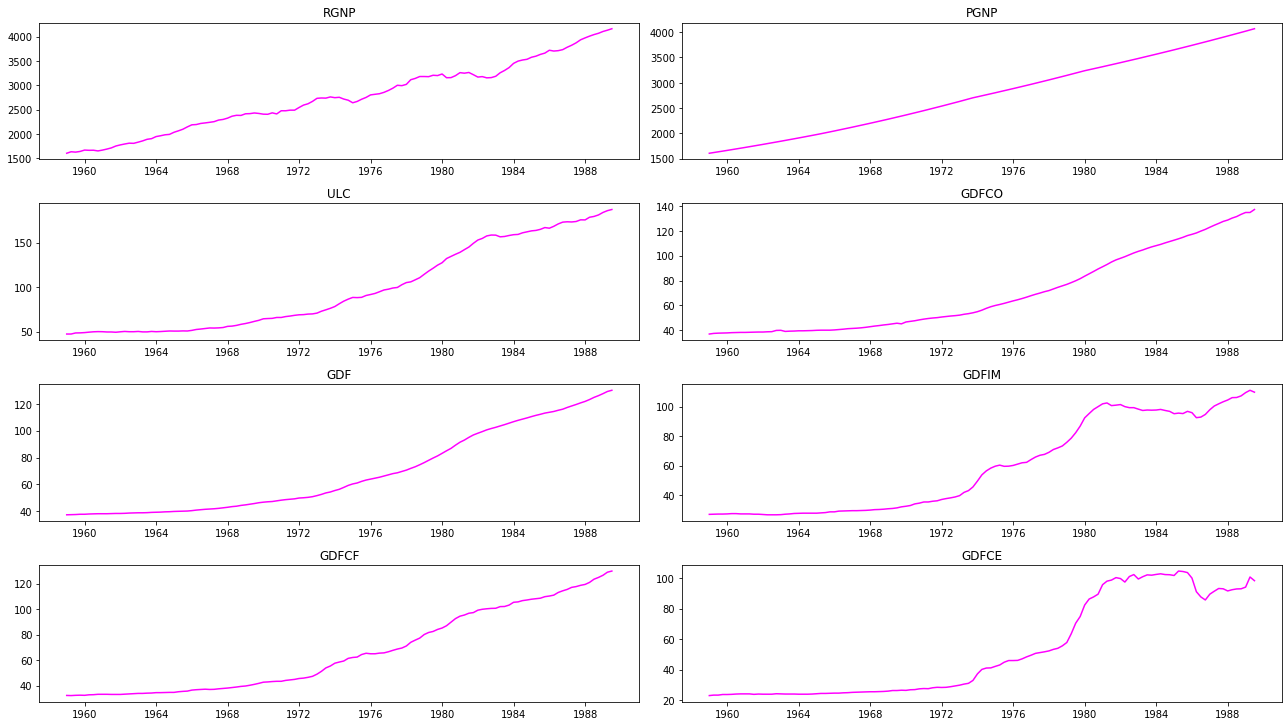

In [5]:
num_feats=[col for col in df.columns]

# Plot distribution of numerical columns
fig=plt.figure(figsize=(18,20))
for i, col in enumerate(num_feats):
    plt.subplot(len(num_feats),2,1*i+1)
    plt.plot(df[col], color ='magenta')
    plt.title(col.upper())  
fig.tight_layout()
plt.show()


Reviewing the line plot, it suggests that there may be an increasing sales trend throughout the historical change and there is also seasonality and height of the cycles appears to be the same, suggesting that it is additive, rather than multiplicative.  Each of the series have a fairly similar trend patterns over the years except for gdfce and gdfim, where a different pattern is noticed starting in 1980.

#### **<span style = 'color:purple'>3.1.2 Statistical Data Summary with Tableone</span>**<a id ="Tableone"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [6]:
pip install tableone --quiet

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Import tableone
from tableone import TableOne

# Create a simple Table 1 with no grouping variable
# Test for normality, multimodality (Hartigan's Dip Test), and far outliers (Tukey's test)
#Create an instance of TableOne with the input arguments:
table1 = TableOne(df, dip_test=True, normal_test=True, tukey_test=True)
# View table1 (note the remarks below the table)
table1

,,Missing,Overall
n,,,123
"rgnp, mean (SD)",,0,2747.1 (702.4)
"pgnp, mean (SD)",,0,2758.5 (735.0)
"ulc, mean (SD)",,0,98.3 (47.7)
"gdfco, mean (SD)",,0,69.5 (31.7)
"gdf, mean (SD)",,0,68.5 (30.2)
"gdfim, mean (SD)",,0,59.4 (31.1)
"gdfcf, mean (SD)",,0,66.3 (31.6)
"gdfce, mean (SD)",,0,52.9 (31.6)


##### **Exploring the warning raised by Hartigan's Dip Test**
Hartigan's Dip Test reports possible multimodal distributions for: ulc, gdfim, gdfce. A distribution with one peak is called unimodal A distribution with two peaks is called bimodal A distribution with two peaks or more is multimodal A bimodal distribution is also multimodal, as there are multiple peaks. We'll plot the distributions here.

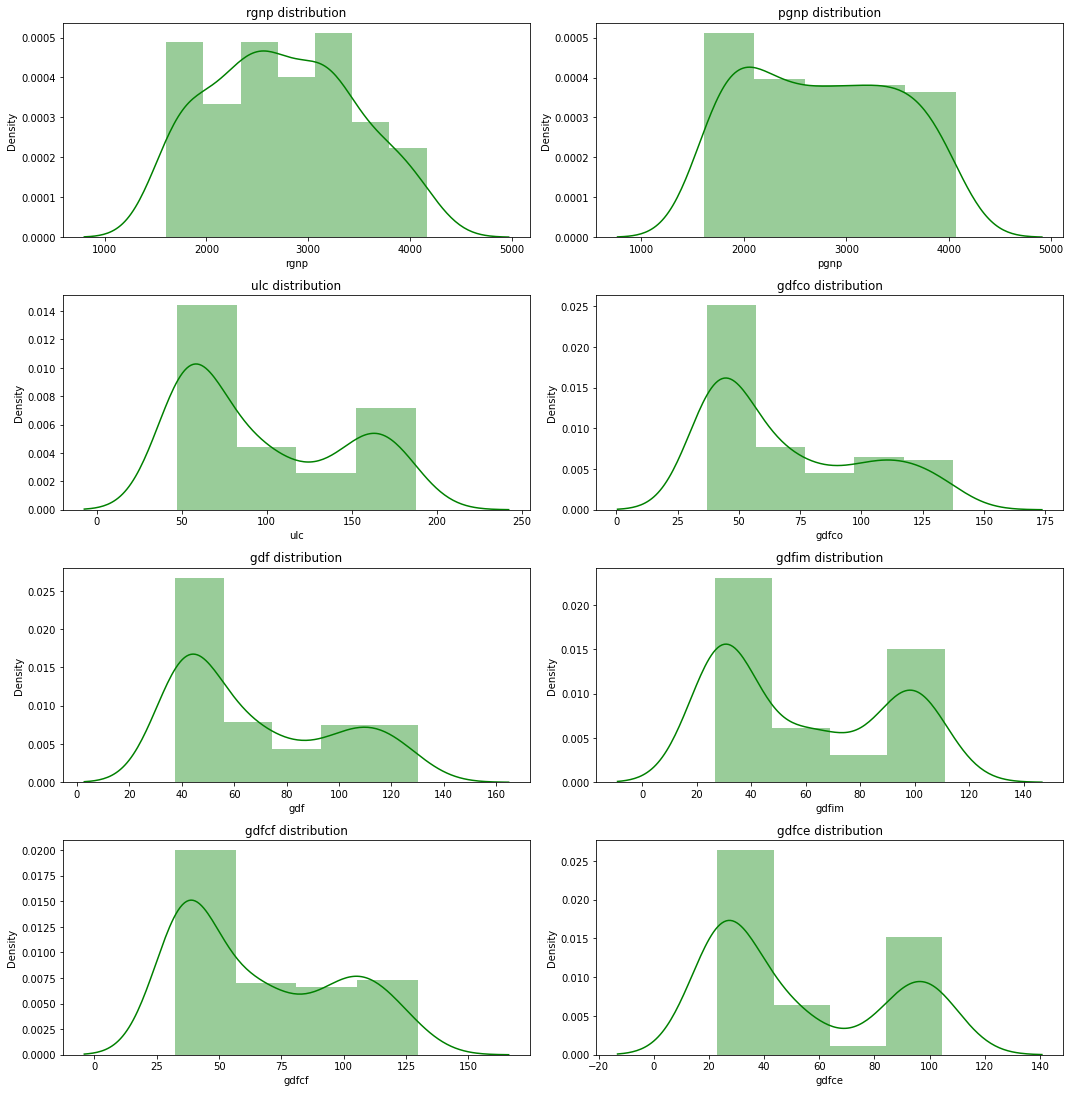

In [8]:
fig=plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
    plt.subplot(len(num_feats),2,1*i+1)
    sb.distplot(df[col], color = 'green')
    plt.title(f'{col} distribution')
plt.tight_layout()

##### **Exploring the warning raised by Normality test by Shapiro-Wilk test for normality**
The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

In [9]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
for col in df.columns:
    print(shapiro(df[col]), 'for', col)

ShapiroResult(statistic=0.965204656124115, pvalue=0.002909181173890829) for rgnp
ShapiroResult(statistic=0.9463578462600708, pvalue=9.616046736482531e-05) for pgnp
ShapiroResult(statistic=0.848464846611023, pvalue=6.865550350454441e-10) for ulc
ShapiroResult(statistic=0.8545452356338501, pvalue=1.2102798763180544e-09) for gdfco
ShapiroResult(statistic=0.8543974757194519, pvalue=1.1935092913972767e-09) for gdf
ShapiroResult(statistic=0.8232524991035461, pvalue=7.574563198886608e-11) for gdfim
ShapiroResult(statistic=0.8674657344818115, pvalue=4.254786745150341e-09) for gdfcf
ShapiroResult(statistic=0.7801268696784973, pvalue=2.7187618475976727e-12) for gdfce


Since the p-value of 'rgnp' is less than .05, the null hypothesis of normality is to be rejected. We do have sufficient evidence to say that the 'rgnp' does not come from a normal distribution.

Next step is to analyze for causality amongst these series. The Granger’s Causality test and the Cointegration test can help us with that.

#### **<span style = 'color:purple'>3.1.3 Testing Causation using Granger’s Causality Test</span>**<a id ="Causality"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

The intuition behind Granger’s Causality Test is that each of the time series in the system influences each other. If this is known, the series with past values of itself can be predicted along with other series in the system.

Using Granger’s Causality Test, it’s possible to select the features responsible for change in behaviour of dependent variables before even building the model.

In Granger’s causality tests all variables are considered simultaneously as predictors (X) and targets (Y).  The null hypothesis is the coefficients of past values in the regression equation is zero. In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then the null hypothesis can be rejected safely.

The below code implements the Granger’s Causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

Check Granger Causality of all possible combinations of the Time series.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


The row are the Response (Y) and the columns are the predictor series (X).
For example, if you take the value 0.0003 in (row 1, column 2), it refers to the p-value of pgnp_x causing rgnp_y. Whereas, the 0.000 in (row 2, column 1) refers to the p-value of rgnp_y causing pgnp_x.

So, how to interpret the p-values?

If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

For example, P-Value of 0.0003 at (row 1, column 2) represents the p-value of the Grangers Causality test for pgnp_x causing rgnp_y, which is less that the significance level of 0.05.

So, you can reject the null hypothesis and conclude pgnp_x causes rgnp_y.

Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.

This makes this system of multi time series a good candidate for using VAR models to forecast.

Next, going for the Cointegration test.

#### **<span style = 'color:purple'>3.1.4 Johanssen Cointegration Test</span>**<a id ="Cointegration"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
The basic concept of Cointegration (a technique introduced by Robert Engle and Clive Granger) is that two or more non-stationary times series data are integrated together in a way that they cannot move away from some equilibrium in the long term. Cointegration test helps to establish the presence of a statistically significant connection between two or more time series. When you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated. It would imply that a linear combination of the time series can be created, which would result in stationarity.

But, what does Order of integration(d) mean?
Order of integration(d) is nothing but the number of differencing required to make a non-stationary time series stationary.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which multivariate models is based on. So, it’s fairly common to implement the cointegration test before starting to build multivariate models.

Johanssen cointegration test is pretty straightforward to implement using python’s statsmodels, as can be seen below. This is done according to the procedure devised by Soren Johanssen in his [paper (1991)](https://www.econometricsociety.org/publications/econometrica/1991/11/01/estimation-and-hypothesis-testing-cointegration-vectors)to implement this test.

The Johansen test will give the same result even if the order of the time series is reversed, you can try this as an exercise. This test can be used as an order independent way to check for cointegration. This test allows us to check for cointegration between triplets, quadruplets and so on up to 12-time series.

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
rgnp   ::  248.0     > 143.6691  =>   True
pgnp   ::  183.12    > 111.7797  =>   True
ulc    ::  130.01    > 83.9383   =>   True
gdfco  ::  85.28     > 60.0627   =>   True
gdf    ::  55.05     > 40.1749   =>   True
gdfim  ::  31.59     > 24.2761   =>   True
gdfcf  ::  14.06     > 12.3212   =>   True
gdfce  ::  0.45      > 4.1296    =>   False


**Split the Series into Training and Testing Data**

Splitting the dataset into training and test data. separate the last 4 quaters of the data as test data and the remaining part as training data. 

The VAR model will be fitted on df_train and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data.

To do the comparisons, we will use multiple forecast accuracy metrics, as seen later in this article.

In [12]:
size = 25
df_train, df_test = df[0:-size], df[-size:]

# Check size
print(df_train.shape)  
print(df_test.shape)  

(98, 8)
(25, 8)


#### **<span style = 'color:purple'>3.1.5 Check for Stationarity and Make the Time Series Stationary</span>**<a id ="Stationary"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

A stationary time series is one in which the properties — mean, variance and covariance, do not vary with time. Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity and make sure their means and variances are constant over time and do not show any trending behaviour.

So, how to test for stationarity? 

There is a series of statistical tests and the popular ones are:

* Augmented Dickey-Fuller Test (ADF Test)
* KPSS test
* Philip-Perron test

Another very common practise is to plot a series, as done before and check if it moves around a constant mean value, i.e. a horizontal line. If this is the case, it is likely to be stationary. 

At this point it should be mentioned that even if two time series are not stationary, a special combination of them can still be stationary. This phenomenon is called cointegration and so-called (vector) error correction models (VECM) can be used to analyse it. 

##### **Augmented Dickey-Fuller Test (ADF Test)**
Let’s use the ADF test for our purpose.

By the way, if a series is found to be non-stationary, you make it stationary by differencing the series once and repeat the test again until it becomes stationary.

Since, differencing reduces the length of the series by 1 and since all the time series has to be of the same length, you need to difference all the series in the system if you choose to difference at all.
Got it?

Let’s implement the ADF Test.

First, we implement a nice function (adfuller_test()) that writes out the results of the ADF test for any given time series and implement this function on each series one-by-one.

In [13]:
def ADF_test(series, column_name):
    #Ho: Time Series is Non-Stationary
    #Ha: Time Series is Stationary
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Call the ADF_test() on each series.

In [14]:
# ADF Test on each column
for name, column in df_train.iteritems():
    ADF_test(df_train[name], name)
    print('\n')

Results of Dickey-Fuller Test for column: rgnp
Test Statistic                 -0.713362
p-value                         0.843258
No Lags Used                    1.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: pgnp
Test Statistic                  0.412313
p-value                         0.981950
No Lags Used                    1.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: ulc
Test Statistic                  0.134732
p-value                         0.968354
No Lags Used        

##### **KPSS Test for Stationarity**
KPSS test, short for, Kwiatkowski-Phillips-Schmidt-Shin, is a statistical test to check for stationarity of a series around a deterministic trend. Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series. However, it has couple of key differences compared to the ADF test in function and in practical usage. Therefore, is not safe to just use them interchangeably. 

A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary. So practically, the interpretaion of p-value is just the opposite to each other. That is, if p-value is < signif level (say 0.05), then the series is non-stationary. Whereas in ADF test, it would mean the tested series is stationary.

In python, the statsmodel package provides a convenient implementation of the KPSS test.

To implement the KPSS test, we’ll use the kpss function from the statsmodel. The code below implements the test and prints out the returned outputs and interpretation from the result.

In [15]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, column_name): 
    #Ho: Time Series is TStationary
    #Ha: Time Series is Non-Stationary
    print (f'Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for mean stationarity for column: {column_name}')
    #statistic, p_value, n_lags, critical_values = kpss(series)
    KPSS_results = kpss(series)
    kpssoutput = pd.Series(KPSS_results[0:3], index=['Test Statistic','p-value','No Lags Used'])
    # Format Output
    for key,value in KPSS_results[3].items():
       kpssoutput['Critical Value (%s)'%key] = value
    print (kpssoutput)
    if KPSS_results[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is non-stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is stationary")

A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’. What that effectively means to us is, the test may not necessarily reject the null hypothesis (that the series is stationary) even if a series is steadily increasing or decreasing.

The word ‘deterministic’ implies the slope of the trend in the series does not change permanently. That is, even if the series goes through a shock, it tends to regain its original path. There appears to be a steady increasing trend overall in all plots above. So, we could expect that this series is stationary around the trend.

Applying the KPSS test . .

In [16]:
# KPSS Test on each column
for name, column in df_train.iteritems():
    kpss_test(df_train[name], name)
    print('\n')

Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for mean stationarity for column: rgnp
Test Statistic           1.703495
p-value                  0.010000
No Lags Used             5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is non-stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for mean stationarity for column: pgnp
Test Statistic           1.735836
p-value                  0.010000
No Lags Used             5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is non-stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for mean stationarity for column: ulc
Test Statistic           1.534402
p-value                  0.010000
N

The test says the p-value is significant (with p_value < 0.05) and hence, the null hypothesis (series is stationary) can be rejected and derive that the series is NOT stationary.

But according to the definition of KPSS, it should have not have rejected the null, because of the ‘stationarity around a deterministic trend’. It is because by default, it tests for stationarity around a ‘mean’ only.

##### **KPSS test around a deterministic trend**
In KPSS test, to turn ON the stationarity testing around a trend, pass the regression='ct' parameter to the kpss.

In [17]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, column_name): 
    #Ho: Time Series is Trend Stationary
    #Ha: Time Series is Non-Trend Stationary
    print (f'Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: {column_name}')
    #statistic, p_value, n_lags, critical_values = kpss(series)
    KPSS_results = kpss(series, regression='ct')
    kpssoutput = pd.Series(KPSS_results[0:3], index=['Test Statistic','p-value','No Lags Used'])
    # Format Output
    for key,value in KPSS_results[3].items():
       kpssoutput['Critical Value (%s)'%key] = value
    print (kpssoutput)
    if KPSS_results[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is non-stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is stationary")

In [18]:
# KPSS Test on each column
for name, column in df_train.iteritems():
    kpss_test(df_train[name], name)
    print('\n')

Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: rgnp
Test Statistic           0.119529
p-value                  0.099021
No Lags Used             5.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: pgnp
Test Statistic           0.385506
p-value                  0.010000
No Lags Used             5.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is non-stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: ulc
Test Statistic           0.41312
p-value                  0.01

Now clearly, the p-value of 'rgnp' is so high that you cannot reject the null hypothesis. So the series is stationary around a deterministic trend (Trend Stationary) and non-stationary around a mean. The series is NOT stationary according to ADF test. So overall what this means to us is, if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.


The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

In [19]:
# 1st difference
df_train_differenced = df_train.diff().dropna()

See the change in distribution of variable with differencing

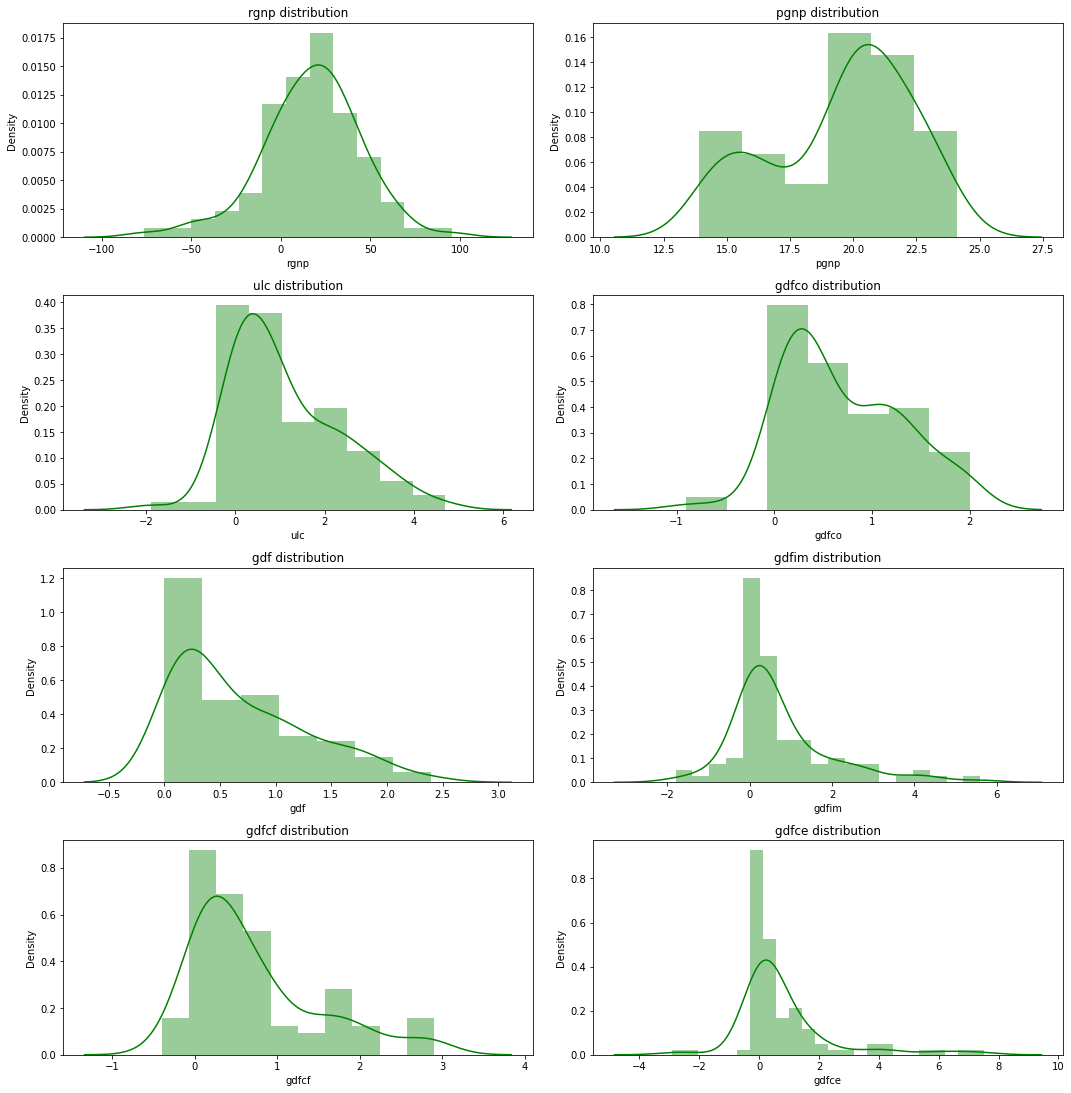

In [20]:
fig=plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
    plt.subplot(len(num_feats),2,1*i+1)
    sb.distplot(df_train_differenced[col], color = 'green')
    plt.title(f'{col} distribution')
plt.tight_layout()

Re-run ADF test on each differenced series.

In [21]:
for name, column in df_train_differenced.iteritems():
    ADF_test(df_train_differenced[name], name)
    print('\n')

Results of Dickey-Fuller Test for column: rgnp
Test Statistic                -7.597906e+00
p-value                        2.432613e-11
No Lags Used                   0.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: pgnp
Test Statistic                 -1.998137
p-value                         0.287391
No Lags Used                    0.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: ulc
Test Statistic                 -2.230965
p-value                         0.195200
No Lags Use

In [22]:
# KPSS Test on each column
for name, column in df_train_differenced.iteritems():
    kpss_test(df_train_differenced[name], name)
    print('\n')

Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: rgnp
Test Statistic           0.0496
p-value                  0.1000
No Lags Used             3.0000
Critical Value (10%)     0.1190
Critical Value (5%)      0.1460
Critical Value (2.5%)    0.1760
Critical Value (1%)      0.2160
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: pgnp
Test Statistic           0.352067
p-value                  0.010000
No Lags Used             5.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is non-stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: ulc
Test Statistic           0.075431
p-value                  0.100000
No Lags 

After the first difference, Real Wages (Manufacturing) is still not stationary. It’s critical value is between 5% and 10% significance level.

All of the series in the VAR model should have the same number of observations.
So, we are left with one of two choices.

That is, either proceed with 1st differenced series or difference all the series one more time.

In [23]:
# Second Differencing
df_train_differenced = df_train_differenced.diff().dropna()

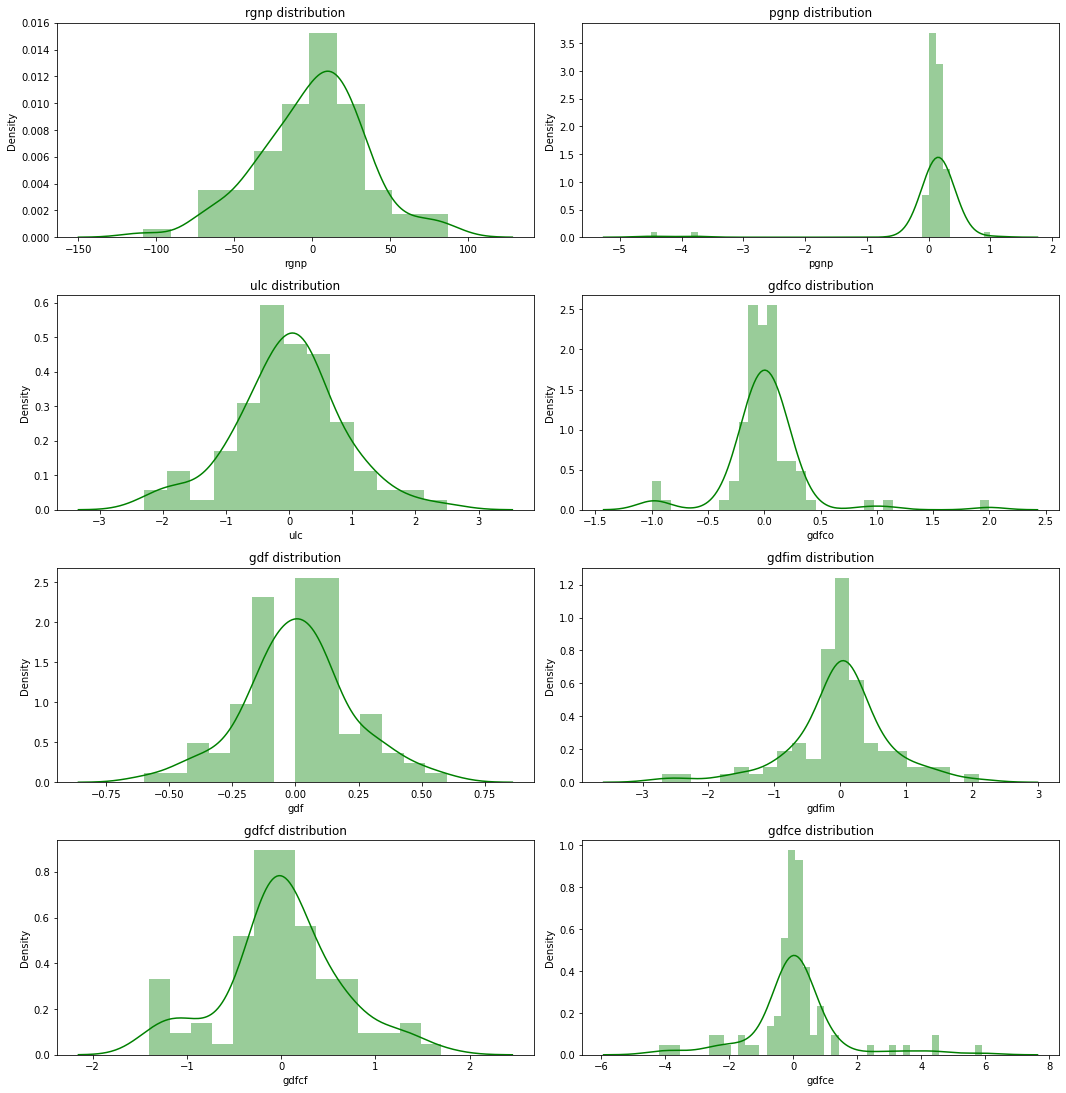

In [24]:
fig=plt.figure(figsize=(15,30))
for i, col in enumerate(df.columns):
    plt.subplot(len(num_feats),2,1*i+1)
    sb.distplot(df_train_differenced[col], color = 'green')
    plt.title(f'{col} distribution')
plt.tight_layout()

Re-run ADF test again on each second differenced series.

In [25]:
for name, column in df_train_differenced.iteritems():
    ADF_test(df_train_differenced[name], name)
    print('\n')

Results of Dickey-Fuller Test for column: rgnp
Test Statistic                -6.361631e+00
p-value                        2.466309e-08
No Lags Used                   4.000000e+00
Number of Observations Used    9.100000e+01
Critical Value (1%)           -3.504343e+00
Critical Value (5%)           -2.893866e+00
Critical Value (10%)          -2.584015e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: pgnp
Test Statistic                -9.919109e+00
p-value                        3.024101e-17
No Lags Used                   0.000000e+00
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: ulc
Test Statistic                -1.303196e+01
p-value                        2.335001e

In [26]:
# KPSS Test on each column
for name, column in df_train_differenced.iteritems():
    kpss_test(df_train_differenced[name], name)
    print('\n')

Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: rgnp
Test Statistic           0.057074
p-value                  0.100000
No Lags Used             8.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: pgnp
Test Statistic           0.035131
p-value                  0.100000
No Lags Used             1.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is stationary


Results of Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for trend stationarity for column: ulc
Test Statistic           0.116472
p-value                 

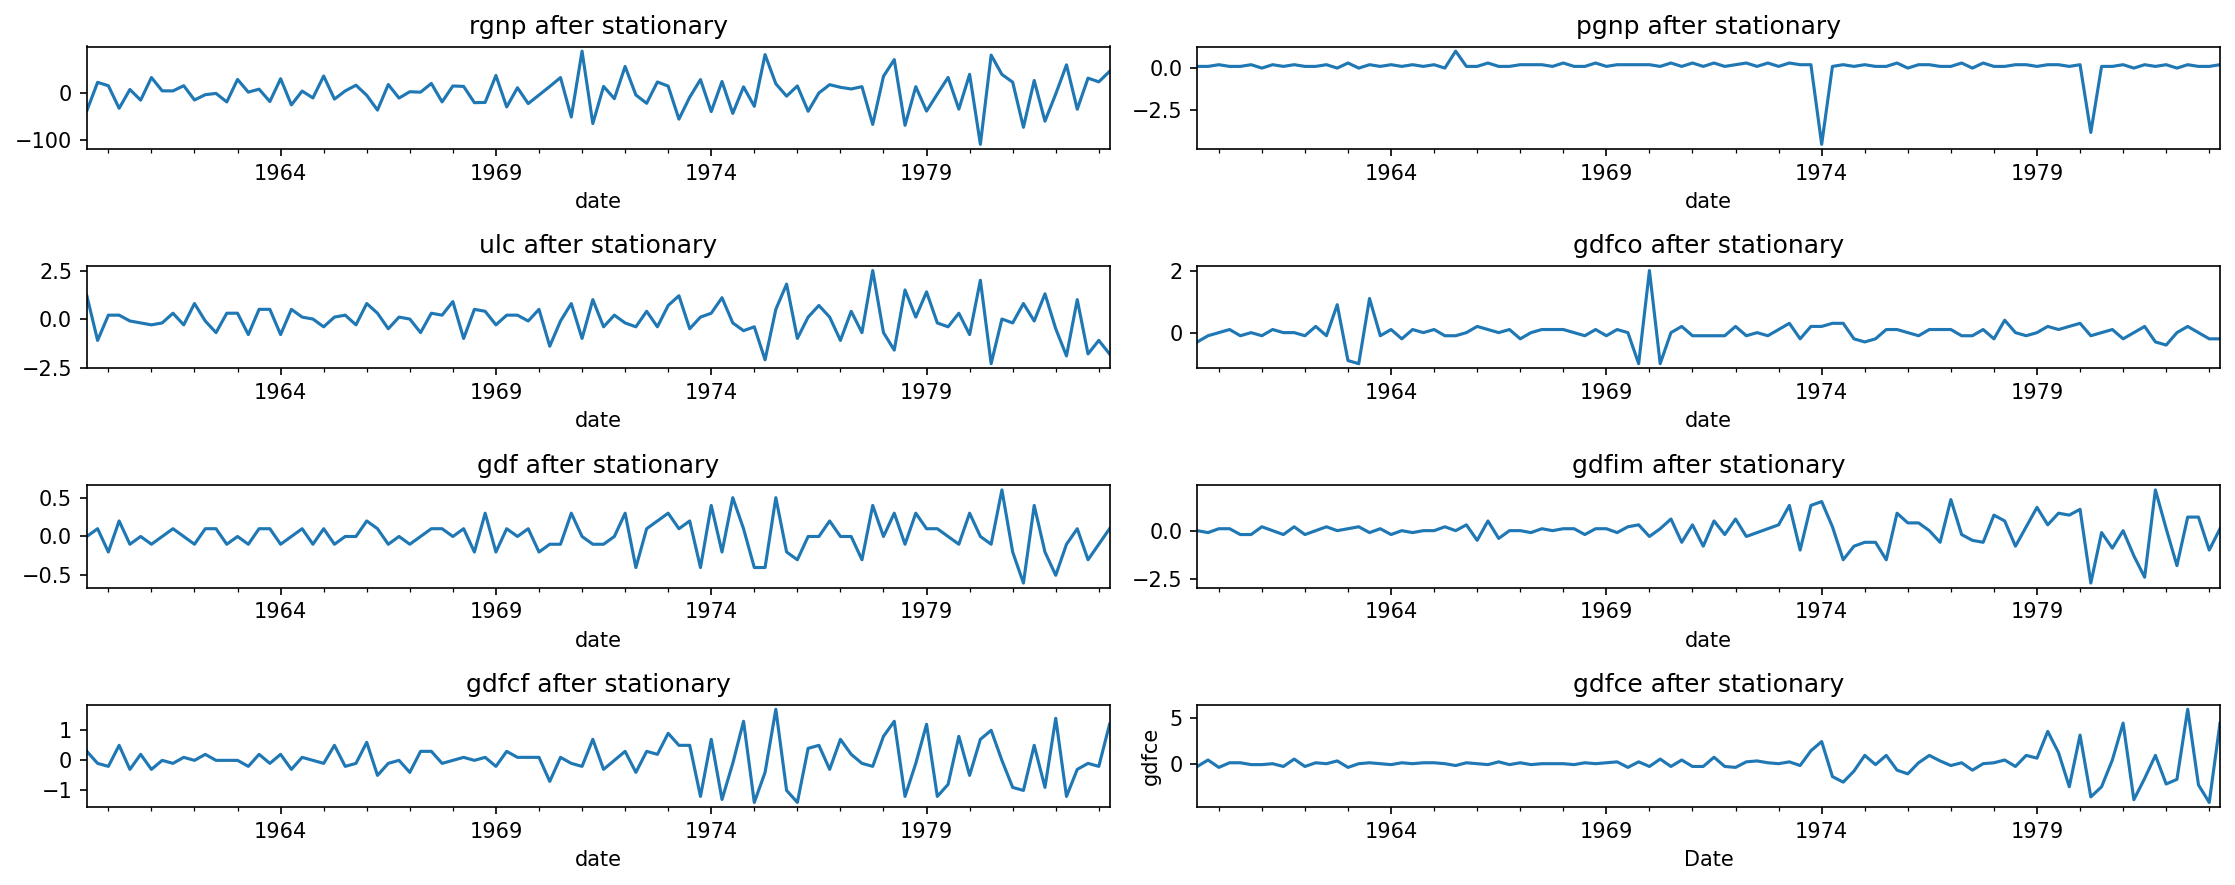

In [27]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_train_differenced.columns, axes.flatten())):
    df_train_differenced[col].plot(figsize=(15, 6), ax=ax)
    plt.xlabel("Date")
    plt.ylabel(col)
    ax.set_title(col + " after stationary")

plt.tight_layout();

### **<span style = 'color:brown'>3.2. Model Estimation and Evaluation</span>**<a id = 'Estimation'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

The procedure for choosing these models relies on choosing the model with the minimum AIC, BIC, FPE and HQIC. The models are presented in Table 3 below with their corresponding values of AIC, BIC, FPE and HQIC.

#### **<span style = 'color:purple'>3.2.1 Estimation of the Order (P) of the model</span>**<a id ="Order"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
To select the right lag order of the model, iteratively fit increasing orders of the model and pick the order that gives a model with least AIC. 

The Akaike information criterion (AIC) is a metric that is used to compare the fit of different regression models. Once you’ve fit several regression models, you can compare the AIC value of each model. The model with the lowest AIC offers the best fit. The absolute value of the AIC value is not important.  It can be positive or negative.The lower the value for AIC, the better the fit of the model. There is no value for AIC that can be considered “good” or “bad” because we simply use AIC as a way to compare regression models. The AIC value is a useful way to determine which regression model fits a dataset the best among a list of potential models, but it doesn’t actually quantify how well the model fits the data. For example, a particular regression model might have the lowest AIC value among a list of potential models, but it may still be a poor fitting model. One potential strategy for choosing the “best” regression model among several potential models is as follows: First, identify the model with the lowest AIC value. Then, fit this regression model to the data and calculate the Mallows’ Cp and adjusted R-squared of the model to quantify how well it actually fits the data.

Though the usual practice is to look at the AIC, other best fit comparison estimates of BIC, FPE and HQIC can also be used.

In [28]:
model = VAR(df_train_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -2.1919248841883823
BIC :  -0.2563550295016568
FPE :  0.11221197811542515
HQIC:  -1.4098094470088949 

Lag Order = 2
AIC :  -2.7343740058226675
BIC :  0.945286530227551
FPE :  0.0670583065226116
HQIC:  -1.2480604703705955 

Lag Order = 3
AIC :  -3.2304159195375215
BIC :  2.216034603372705
FPE :  0.044065600539196746
HQIC:  -1.0312949971281933 

Lag Order = 4
AIC :  -4.1412451193030515
BIC :  3.095191667011587
FPE :  0.020771670685130854
HQIC:  -1.2205579176987502 

Lag Order = 5
AIC :  -4.378527860168773
BIC :  4.671603108375475
FPE :  0.021903962297594174
HQIC:  -0.7273636851812793 

Lag Order = 6
AIC :  -5.5842846610563335
BIC :  5.303775236382151
FPE :  0.010800305688558458
HQIC:  -1.193578897575101 

Lag Order = 7
AIC :  -6.849406973996885
BIC :  5.901359145080146
FPE :  0.007057727000181941
HQIC:  -1.7099390636122003 

Lag Order = 8
AIC :  -8.452496687725835
BIC :  6.186311761463571
FPE :  0.006029272862276394
HQIC:  -2.554888222324358 

Lag Order = 9
AIC :  -

In the above output, the AIC drops to lowest at lag 4, then increases at lag 5 and then continuously drops further.
Let’s go with the lag 4 model.

An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.

The selected order(p) is the order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.

In [29]:
x = model.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,-1.249,-1.027*,0.2867,-1.160
1,-1.779,0.2210,0.1697,-0.9724
2,-2.358,1.420,0.09816,-0.8346
3,-2.939,2.616,0.05965,-0.6990
4,-3.893,3.439,0.02713,-0.9364
5,-4.241,4.870,0.02567,-0.5669
6,-5.584*,5.304,0.01080*,-1.194*


According to FPE and HQIC, the optimal lag is observed at a lag order of 3.

I, however, don’t have an explanation for why the observed AIC and BIC values differ when using result.aic versus as seen using model.select_order().

Since the explicitly computed AIC is the lowest at lag 4, I choose the selected order as 4.

This could be confirmed by Partial Autocorrelation function (PACF) plot.

#### **<span style = 'color:purple'>3.2.2 Partial Autocorrelation Function (PACF) Plot of the Indoor Temperatures</span>**<a id ="PACF"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

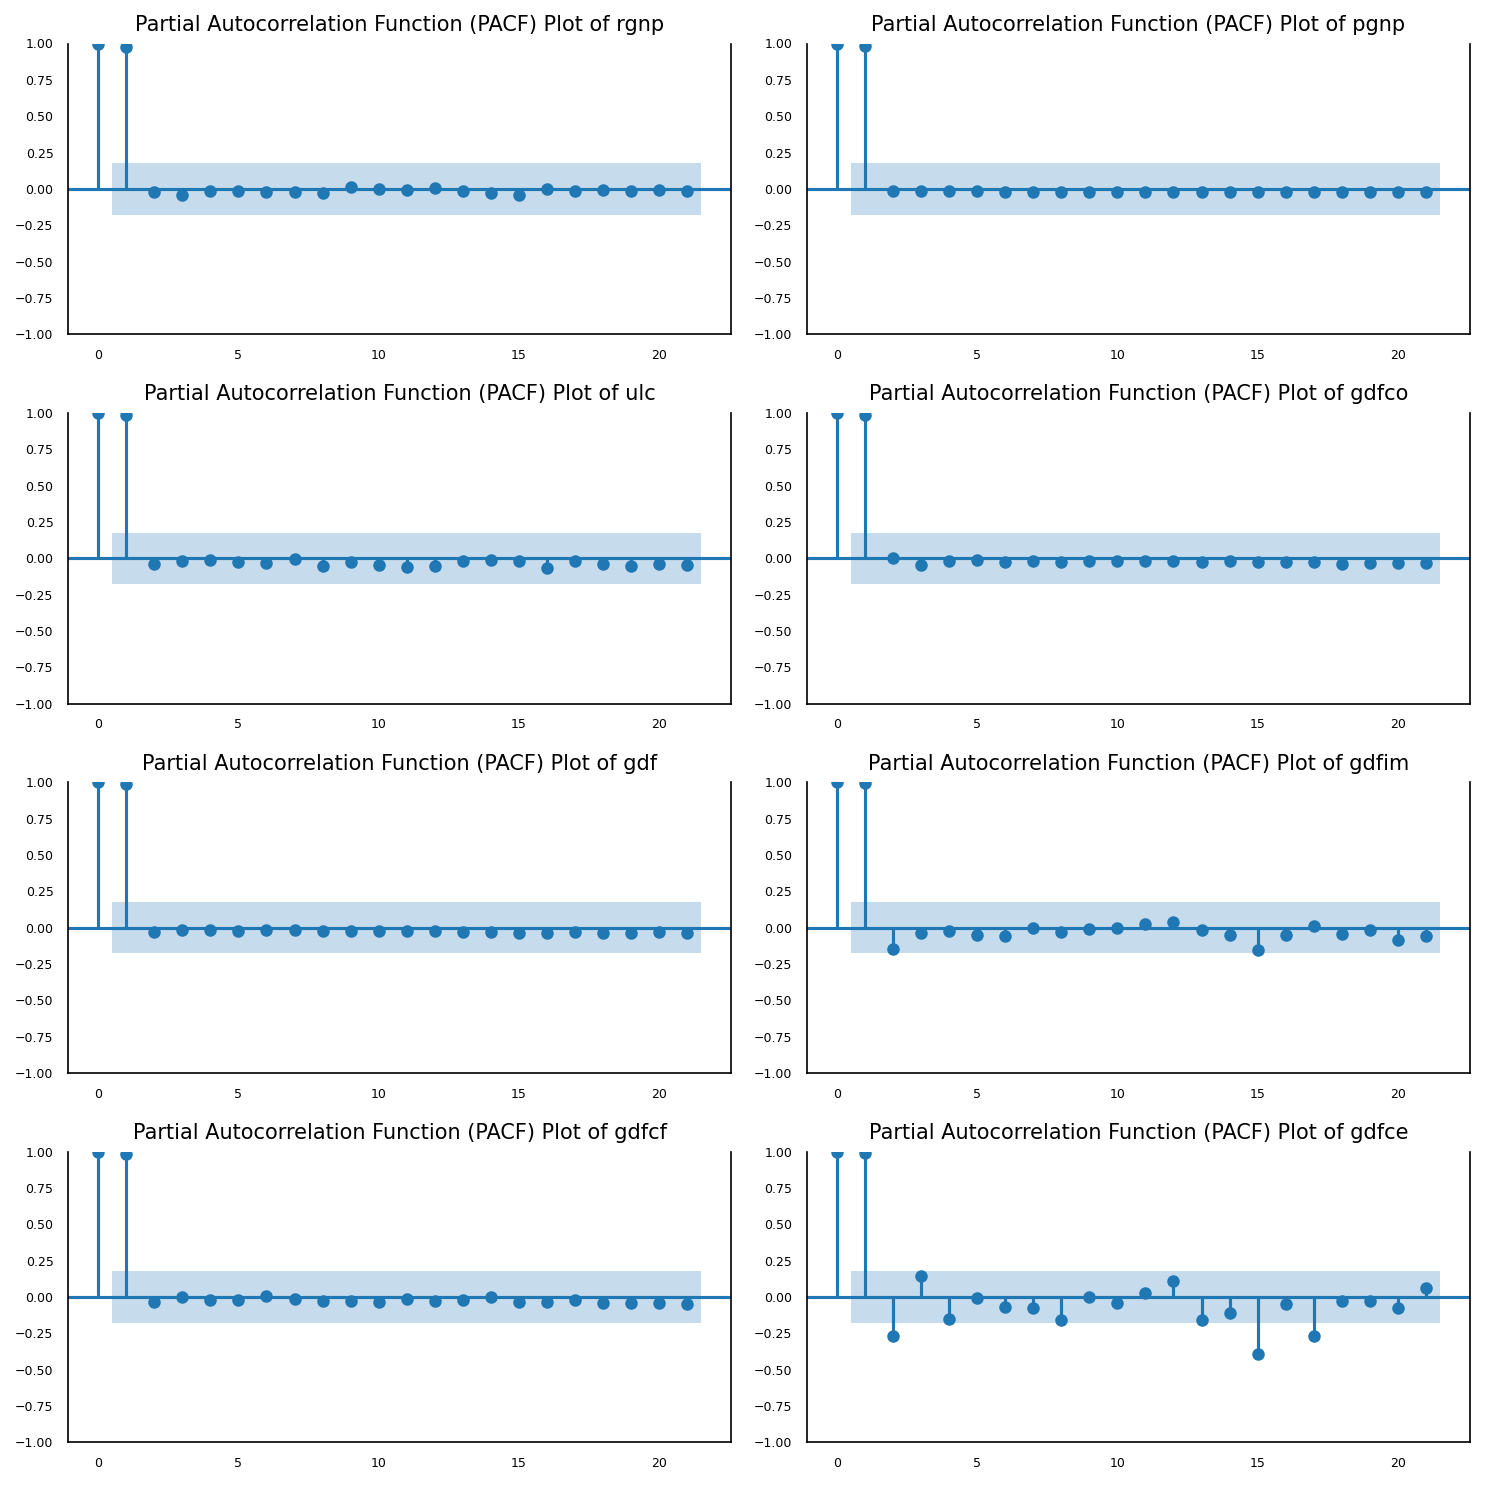

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    plot_pacf(df[col], ax=ax);
    ax.set_title("Partial Autocorrelation Function (PACF) Plot of " +col, fontsize = 10)    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

PACF plot suggests an order 3 for lags. However going with what the model has suggested. 

#### **<span style = 'color:purple'>3.2.3 Train the VAR Model of Selected Order(p)</span>**<a id ="Train"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [31]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Jul, 2022
Time:                     21:40:14
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    3.09519
Nobs:                     92.0000    HQIC:                  -1.22056
Log likelihood:          -589.841    FPE:                  0.0207717
AIC:                     -4.14125    Det(Omega_mle):      0.00178852
--------------------------------------------------------------------
Results for equation rgnp
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.637083         3.040784            0.210           0.834
L1.rgnp         -0.804317         0.184923           -4.349           0.000
L1.pgnp          0.711276         5.585100            0.127           0.899
L1.ul

### **<span style = 'color:brown'>3.3 Model Checking (Goodness of fit)/Model Verification/Model Diagnostics</span>**<a id = 'Diagnostics'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

#### **<span style = 'color:purple'>3.3.1 Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic</span>**<a id ="DWStatistic"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In time series modeling, the selection of a best model fit to the data is directly related to whether residual analysis is performed well. One of the assumptions of ARIMA model is that, for a good model, the residuals must follow a white noise process. That is, the residuals have zero mean, constant variance and also uncorrelated. Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors). If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series. A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.

**[The Durbin-Watson Test](https://www.statology.org/durbin-watson-test/)**
One of the main assumptions in linear regression is that there is no correlation between consecutive residuals. When this assumption is violated, the standard errors of the coefficients in a regression model are likely to be underestimated which means predictor variables are more likely to be deemed statistically significant when they’re actually not. One way to determine if this assumption is met is to perform a Durbin-Watson test, which is used to detect the presence of autocorrelation in the residuals of a regression.

H0 (null hypothesis): There is no correlation among the residuals.

HA (alternative hypothesis): The residuals are autocorrelated.

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

* d = 2 indicates no autocorrelation
* d < 2 indicates positive serial correlation
* d > 2 indicates negative serial correlation

**What to Do if Autocorrelation is Detected?**

If you reject the null hypothesis of the Durbin-Watson test and conclude that autocorrelation is present in the residuals, then you have a few different options to correct this problem if you deem it to be serious enough:

* For positive serial correlation, consider adding lags of the dependent and/or independent variable to the model.
* For negative serial correlation, check to make sure that none of your variables are overdifferenced.

In [32]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col.ljust(6), ':', round(val, 2))

rgnp   : 2.03
pgnp   : 2.04
ulc    : 2.2
gdfco  : 2.03
gdf    : 2.32
gdfim  : 1.98
gdfcf  : 2.13
gdfce  : 2.28


The serial correlation seems quite alright. Let’s proceed with the forecast.

#### **<span style = 'color:purple'>3.3.2 Prediction / Forecast with VAR model using statsmodels</span>**<a id ="Prediction"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [33]:
# Forecast
fc = model_fitted.forecast(y=df_train_differenced.values, steps=size)
df_forecast = pd.DataFrame(fc, index=df.index[-size:], columns=df.columns + '_2d')
df_forecast

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d
date,,,,,,,,
1983-07-01,-72.011596,-1.060125,3.318681,0.189781,-0.238977,-1.219831,0.247970,-3.474857
1983-10-01,72.816241,0.553573,-2.141991,-0.526584,0.253474,-1.421290,-0.301366,-0.614708
1984-01-01,13.057970,0.953465,0.446571,0.508188,0.127609,1.547774,-0.097199,1.664564
1984-04-01,-66.917756,-0.065041,1.205030,0.048031,-0.257341,0.403662,0.421849,0.208334
1984-07-01,59.031249,0.547766,-1.590915,-0.430001,-0.247505,-0.658919,-1.539045,-1.225626
1984-10-01,-65.708107,-0.619413,1.342031,0.194533,0.257447,-0.421941,0.987501,0.990018
1985-01-01,39.024993,0.388166,-0.257765,0.219234,0.119583,1.633539,0.600931,0.255199
1985-04-01,11.506450,0.027998,-0.540961,-0.174821,-0.161212,-0.643242,-0.768050,-1.755518
1985-07-01,7.355540,0.231160,-0.713318,0.112332,0.093720,-0.366000,0.429435,1.787128


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data.

In this case it is two times.

#### **<span style = 'color:purple'>3.3.3 Invert the transformation to get the real forecast</span>**<a id ="Invert"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [34]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [35]:
def inverse_diff(df_train, df_forecast, second_diff=False):
    df_fc = df_forecast.copy()
    columns =  df_train.columns
    
    for col in columns: 
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum() # Roll back 2nd Diff
            df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()# Roll back 1st Diff
    return df_fc

In [36]:
df_results = inverse_diff(df_train, df_forecast, second_diff=True)
df_results

,rgnp_2d,pgnp_2d,ulc_2d,gdfco_2d,gdf_2d,gdfim_2d,gdfcf_2d,gdfce_2d,rgnp_1d,rgnp_forecast,...,gdfco_1d,gdfco_forecast,gdf_1d,gdf_forecast,gdfim_1d,gdfim_forecast,gdfcf_1d,gdfcf_forecast,gdfce_1d,gdfce_forecast
date,,,,,,,,,,,,,,,,,,,,,
1983-07-01,-72.011596,-1.060125,3.318681,0.189781,-0.238977,-1.219831,0.247970,-3.474857,-0.311596,3257.988404,...,1.289781,105.889781,0.761023,104.361023,-2.119831,95.280169,1.547970,103.547970,-1.974857,98.825143
1983-10-01,72.816241,0.553573,-2.141991,-0.526584,0.253474,-1.421290,-0.301366,-0.614708,72.504644,3330.493048,...,0.763197,106.652978,1.014497,105.375521,-3.541121,91.739048,1.246604,104.794573,-2.589565,96.235578
1984-01-01,13.057970,0.953465,0.446571,0.508188,0.127609,1.547774,-0.097199,1.664564,85.562614,3416.055662,...,1.271385,107.924363,1.142106,106.517627,-1.993347,89.745701,1.149404,105.943978,-0.925001,95.310577
1984-04-01,-66.917756,-0.065041,1.205030,0.048031,-0.257341,0.403662,0.421849,0.208334,18.644858,3434.700521,...,1.319416,109.243779,0.884765,107.402392,-1.589685,88.156016,1.571254,107.515231,-0.716668,94.593909
1984-07-01,59.031249,0.547766,-1.590915,-0.430001,-0.247505,-0.658919,-1.539045,-1.225626,77.676107,3512.376628,...,0.889415,110.133194,0.637260,108.039652,-2.248604,85.907412,0.032208,107.547439,-1.942293,92.651616
1984-10-01,-65.708107,-0.619413,1.342031,0.194533,0.257447,-0.421941,0.987501,0.990018,11.968000,3524.344628,...,1.083948,111.217143,0.894707,108.934358,-2.670545,83.236867,1.019709,108.567148,-0.952276,91.699340
1985-01-01,39.024993,0.388166,-0.257765,0.219234,0.119583,1.633539,0.600931,0.255199,50.992993,3575.337621,...,1.303182,112.520325,1.014289,109.948647,-1.037005,82.199862,1.620640,110.187789,-0.697077,91.002264
1985-04-01,11.506450,0.027998,-0.540961,-0.174821,-0.161212,-0.643242,-0.768050,-1.755518,62.499444,3637.837065,...,1.128362,113.648686,0.853078,110.801725,-1.680247,80.519615,0.852590,111.040379,-2.452595,88.549669
1985-07-01,7.355540,0.231160,-0.713318,0.112332,0.093720,-0.366000,0.429435,1.787128,69.854984,3707.692049,...,1.240694,114.889380,0.946797,111.748522,-2.046247,78.473368,1.282025,112.322403,-0.665467,87.884202


In [37]:
df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
                   'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,rgnp_forecast,pgnp_forecast,ulc_forecast,gdfco_forecast,gdf_forecast,gdfim_forecast,gdfcf_forecast,gdfce_forecast
date,,,,,,,,
1983-07-01,3257.988404,3521.639875,158.118681,105.889781,104.361023,95.280169,103.547970,98.825143
1983-10-01,3330.493048,3542.133324,157.395371,106.652978,105.375521,91.739048,104.794573,96.235578
1984-01-01,3416.055662,3563.580237,157.118633,107.924363,106.517627,89.745701,105.943978,95.310577
1984-04-01,3434.700521,3584.962109,158.046924,109.243779,107.402392,88.156016,107.515231,94.593909
1984-07-01,3512.376628,3606.891747,157.384301,110.133194,108.039652,85.907412,107.547439,92.651616
1984-10-01,3524.344628,3628.201972,158.063710,111.217143,108.934358,83.236867,108.567148,91.699340
1985-01-01,3575.337621,3649.900363,158.485353,112.520325,109.948647,82.199862,110.187789,91.002264
1985-04-01,3637.837065,3671.626752,158.366036,113.648686,110.801725,80.519615,111.040379,88.549669
1985-07-01,3707.692049,3693.584300,157.533401,114.889380,111.748522,78.473368,112.322403,87.884202


#### **<span style = 'color:purple'>3.3.4 Plot of Forecast vs Actuals</span>**<a id ="Plot"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

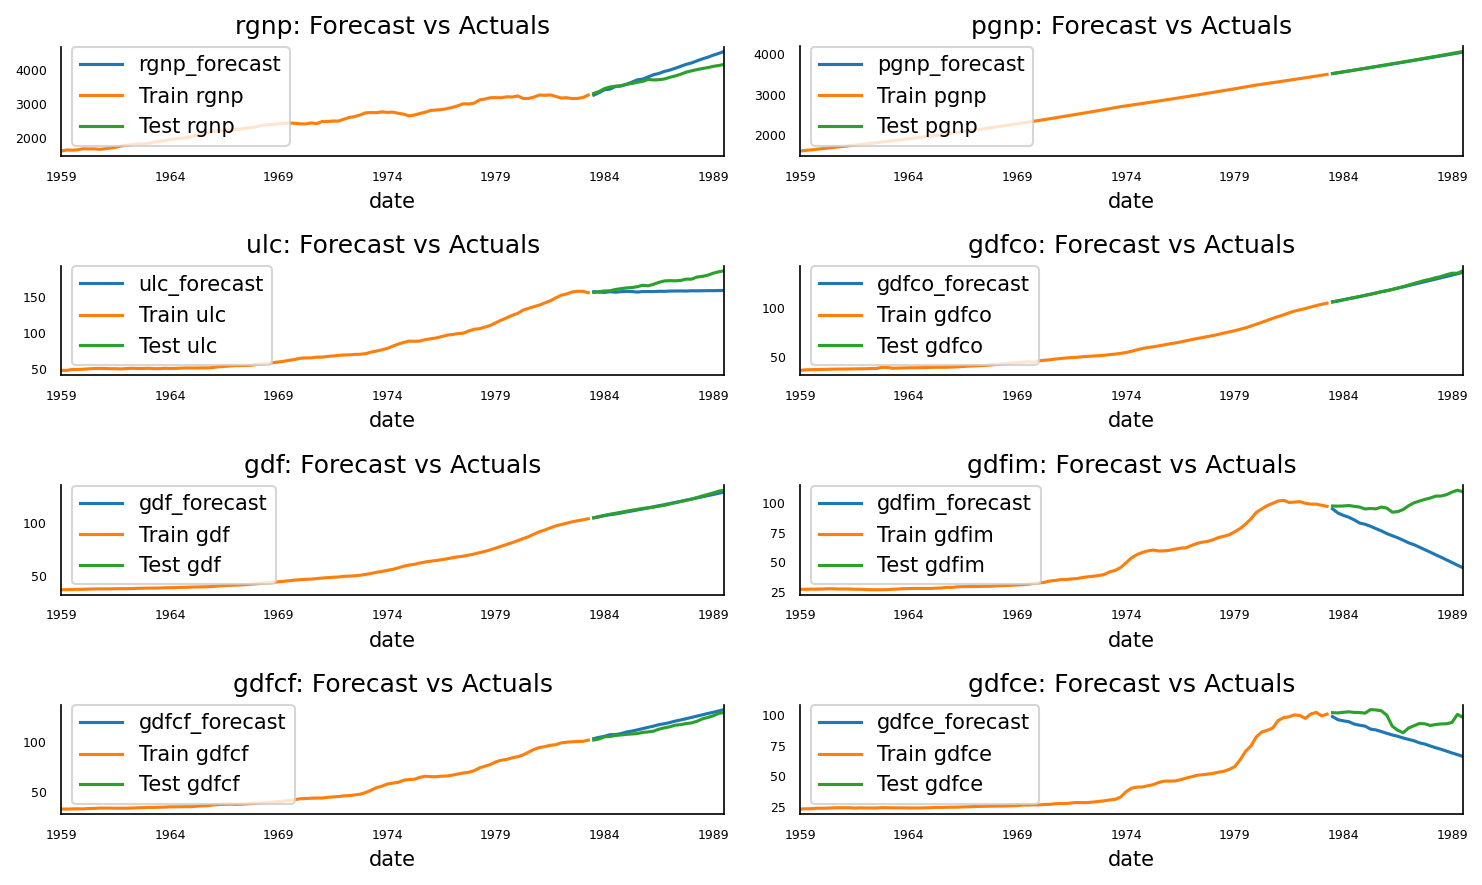

In [38]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_train[col].plot(legend=True, ax=ax, label='Train '+str(col));
    df_test[col][-size:].plot(legend=True, ax=ax, label='Test '+str(col));
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#### **<span style = 'color:purple'>3.3.5 Evaluation metrics using Forecasts</span>**<a id ="Metrics"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.

In [39]:
def evaluation_metrics(forecast, actual):
    print('MAPE :',  np.mean(np.abs(forecast - actual)/np.abs(actual))) 
    print('ME :',np.mean(forecast - actual))             
    print('MAE :', np.mean(np.abs(forecast - actual)))    
    print('MPE :', np.mean((forecast - actual)/actual))   
    print('RMSE :',np.mean((forecast - actual)**2)**.5)  
    print('CORR :', np.corrcoef(forecast, actual)[0,1])   
    print('RSS :', np.sum((forecast - actual) ** 2))
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    print('MINMAX :', 1 - np.mean(mins/maxs))             

In [40]:
for i in df.columns:
    print(f'\n \n Evaluation metric for {i}')
    print(evaluation_metrics(df_results[i+'_forecast'].values , df_test[i].values))


 
 Evaluation metric for rgnp
MAPE : 0.04168603528244643
ME : 146.8142770806871
MAE : 163.07055609214635
MPE : 0.03693729521684189
RMSE : 201.8712139033625
CORR : 0.99451607555267
RSS : 1018799.6750704284
MINMAX : 0.03931124553638299
None

 
 Evaluation metric for pgnp
MAPE : 0.0016605757576373817
ME : -6.48972989803744
MAE : 6.48972989803744
MPE : -0.0016605757576373817
RMSE : 8.280260770127825
CORR : 0.9999513561569222
RSS : 1714.067960532946
MINMAX : 0.0016605757576374502
None

 
 Evaluation metric for ulc
MAPE : 0.06858401809832929
ME : -12.003201853402784
MAE : 12.084696356845607
MPE : -0.06806527523745837
RMSE : 14.521419719859905
CORR : 0.9189594811750303
RSS : 5271.790767008403
MINMAX : 0.06858234709511846
None

 
 Evaluation metric for gdfco
MAPE : 0.004772915279706058
ME : -0.5648257701580462
MAE : 0.6123565604011617
MPE : -0.004359435085573463
RMSE : 0.8700457574021707
CORR : 0.9991387015286104
RSS : 18.92449049933792
MINMAX : 0.004772684291770357
None

 
 Evaluation metric

In [41]:
def evaluation_metrics_condensed(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    MSE = np.mean((forecast - actual)**2)       # MSE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #RSS = np.sum((forecast - actual) ** 2)     # RSS
    RSS = np.sum(np.square(forecast - actual))  # RSS
    
    
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse, 
            'CORR':corr, 'MINMAX':minmax, 'RSS' :RSS})

In [42]:
for i in df.columns:
    print(f'\n \n Evaluation metric for {i}')
    print(evaluation_metrics_condensed(df_results[i+'_forecast'].values , df_test[i].values))


 
 Evaluation metric for rgnp
{'MAPE': 0.04168603528244643, 'ME': 146.8142770806871, 'MAE': 163.07055609214635, 'MPE': 0.03693729521684189, 'RMSE': 201.8712139033625, 'CORR': 0.99451607555267, 'MINMAX': 0.03931124553638299, 'RSS': 1018799.6750704284}

 
 Evaluation metric for pgnp
{'MAPE': 0.0016605757576373817, 'ME': -6.48972989803744, 'MAE': 6.48972989803744, 'MPE': -0.0016605757576373817, 'RMSE': 8.280260770127825, 'CORR': 0.9999513561569222, 'MINMAX': 0.0016605757576374502, 'RSS': 1714.067960532946}

 
 Evaluation metric for ulc
{'MAPE': 0.06858401809832929, 'ME': -12.003201853402784, 'MAE': 12.084696356845607, 'MPE': -0.06806527523745837, 'RMSE': 14.521419719859905, 'CORR': 0.9189594811750303, 'MINMAX': 0.06858234709511846, 'RSS': 5271.790767008403}

 
 Evaluation metric for gdfco
{'MAPE': 0.004772915279706058, 'ME': -0.5648257701580462, 'MAE': 0.6123565604011617, 'MPE': -0.004359435085573463, 'RMSE': 0.8700457574021707, 'CORR': 0.9991387015286104, 'MINMAX': 0.004772684291770357,

#### **<span style = 'color:purple'>3.3.6 Residual Plots</span>**<a id ="Residual"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
Many of the assumptions that are necessary to have a valid  model can be checked by identifying patterns in the residuals of that model. We can make a quick visual check by looking at the residual plot of a given model.

With a residual plot, we look at the predicted values of the model versus the residuals themselves. What we expect to see is just a cloud of unrelated points

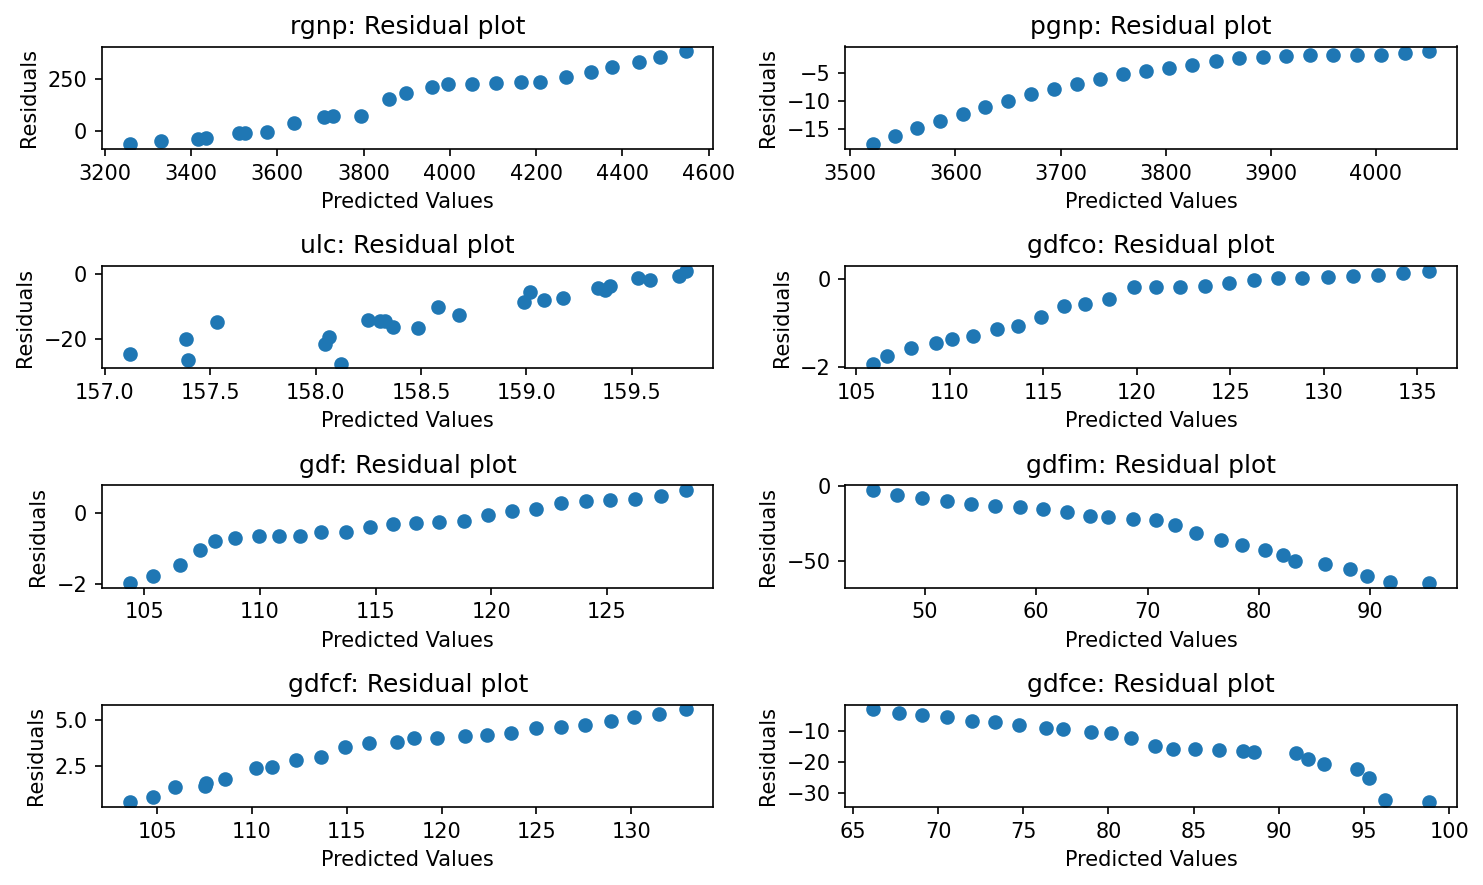

In [43]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    residuals = sorted([x - y for x, y in zip(df_results[col+'_forecast'].values , df_test[col].values)])
    ax.scatter(df_results[col+'_forecast'], residuals)
    ax.set_title(col + ": Residual plot")
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    
plt.tight_layout();

breusch_pagan_p = smd.het_breuschpagan(model_fitted.resid, model_fitted.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print("The relationship is not heteroscedastic.")
if breusch_pagan_p < 0.05:
    print("The relationship is heteroscedastic.")

#### **<span style = 'color:purple'>3.3.7 Normality Test for Residuals</span>**<a id ="Normality"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

##### **RMSFE**
RMSFE (root mean squared forecasting error) is very similar to RMSE. The only difference is that RMSFE has to be calculated on residual terms from predictions on unseen data (ie. Validation or Test set).

It is important to ensure that the residuals of validation predictions are normally distributed. For this use a PP-plot and test its normality with any or all of the Normality tests like: Shapiro Wilk test, Kolmogorov-Smirnov test, Jarque-Bera test, Anderson-Darling test (from both scipy and statsmodels), Kolmogorov-Smirnov, and D’Agostino K-squared tests.

The PP-plot(Probability-to-Probability) plots the data sample against the normal distribution plot in such a way that if normally distributed, the data points will form a straight line.

The normality tests determine how likely a data sample is from a normally distributed population using p-values. The null hypothesis for each test is that “the sample came from a normally distributed population”. This means that if the resulting p-values are below a chosen alpha value, then the null hypothesis is rejected. Thus there is evidence to suggest that the data comes from a non-normal distribution. For this project, use an Alpha value of 0.01.

The below executed normality tests determine how likely a data sample is from a normally distributed population using p-values. The null hypothesis for each test is that “the sample came from a normally distributed population”. 


 
 Residulas for rgnp
[-63.299479387113934, -48.41159620791086, -35.64433781474145, -34.60695177376601, -10.855371907303379, -8.223371906206467, -2.162378646198249, 38.63706509417216, 67.71483593361381, 71.89204918093537, 72.3082750207559, 154.39955593203695, 185.24819490491518, 213.11041135549294, 224.6963426616062, 227.87664862000338, 229.66271146348163, 233.7930629997527, 234.82199996349118, 258.00677075710064, 284.1687783987745, 306.81082957819535, 330.8367505094757, 355.81968665262957, 383.7564456339851]

 
 Shapiro Wilk test results for rgnp
ShapiroResult(statistic=0.9239004254341125, pvalue=0.06290572136640549)

 
 Kolmogorov-Smirnov test results for rgnp
KstestResult(statistic=0.72, pvalue=1.150136122881724e-13)

 
 Jarque-Bera test results for rgnp
Jarque_beraResult(statistic=1.9174967850975202, pvalue=0.3833724175942995)

 
 Anderson-Darling test results for rgnp
AndersonResult(statistic=0.7242389090722874, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), signific

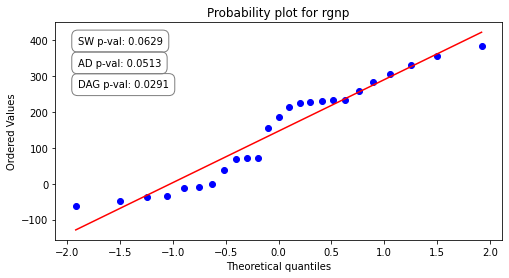

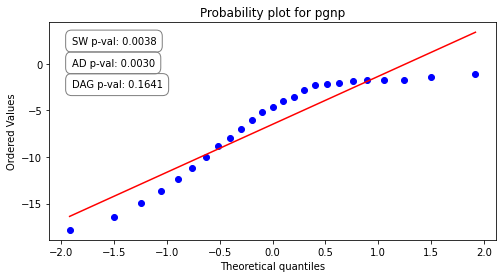

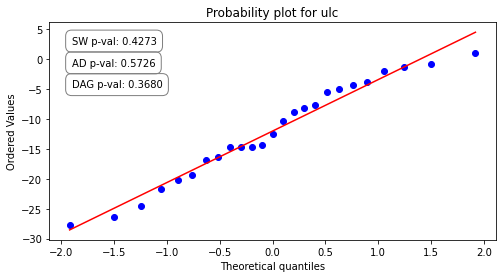

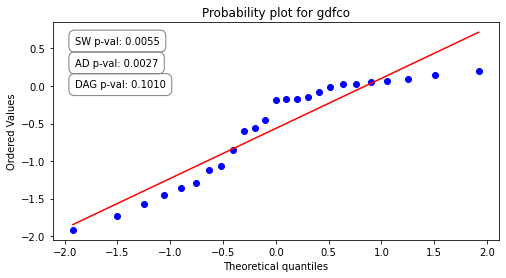

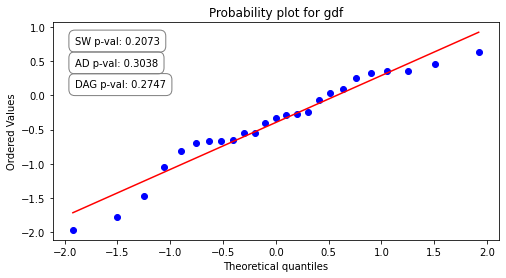

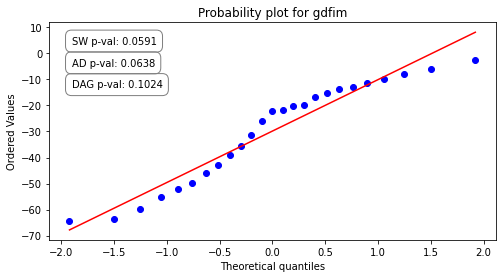

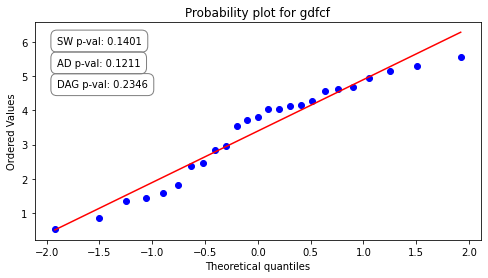

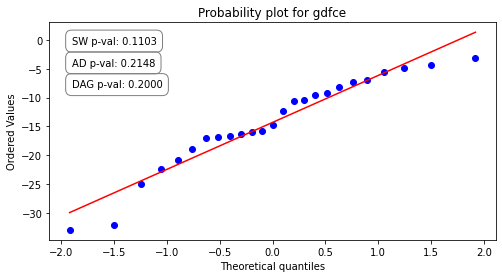

In [44]:
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.diagnostic import lilliefors
from scipy import stats

for i in df.columns:
    residuals = sorted([x - y for x, y in zip(df_results[i+'_forecast'].values , df_test[i].values)])
    sw_result = stats.shapiro(residuals)#Shapiro Wilk test
    KS_result = stats.kstest(residuals, 'norm')#Kolmogorov-Smirnov test 
    JB_result = stats.jarque_bera(residuals) #Jarque-Bera test
    AD_result = stats.anderson(residuals)#Anderson-Darling test
    ad_result = normal_ad(np.array(residuals), axis=0)#Anderson-Darling test
    dag_result = stats.normaltest(residuals, axis=0, nan_policy='propagate')#D’Agostino’s K-squared test
    lf_result = lilliefors(residuals)#Lilliefors test
    print(f'\n \n Residulas for {i}')
    print(residuals)
    print(f'\n \n Shapiro Wilk test results for {i}')
    print(sw_result)
    print(f'\n \n Kolmogorov-Smirnov test results for {i}')
    print(KS_result)
    print(f'\n \n Jarque-Bera test results for {i}')
    print(JB_result)
    print(f'\n \n Anderson-Darling test results for {i}')
    print(AD_result)
    print(f'\n \n Anderson-Darling test results for {i}')
    print(ad_result)
    print(f'\n \n D’Agostino’s K-squared test results for {i}')
    print(dag_result)
    print(f'\n \n Lilliefors test results for {i}')
    print(lf_result)
    plt.figure(figsize=(8,4))
    res = stats.probplot(residuals, plot=plt)
    plt.title(f'Probability plot for {i}')
    ax = plt.gca()
    ax.annotate("SW p-val: {:.4f}".format(sw_result[1]), xy=(0.05,0.9), xycoords='axes fraction', fontsize=10,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))
    ax.annotate("AD p-val: {:.4f}".format(ad_result[1]), xy=(0.05,0.8), xycoords='axes fraction', fontsize=10,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))
    ax.annotate("DAG p-val: {:.4f}".format(dag_result[1]), xy=(0.05,0.7), xycoords='axes fraction', fontsize=10,
            bbox=dict(boxstyle="round", fc="none", ec="gray", pad=0.6))
    print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////\n')

All the above normality tests returned a p-value greater than the alpha value of 0.01. That means that the null hypothesis can not be rejected and it is likely that the data points come from a normal distribution. We can now use RMSFE to generate prediction intervals on our forecast.


#### **<span style = 'color:purple'>3.3.8 Autocorrelation of residuals</span>**<a id ="Autocorrelation"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
As with all statistical properties, we require a statistical test to ultimately decide whether there is autocorrelation in our residuals or not. A Ljung-Box test is used to detect autocorrelation in a time series. The Ljung-Box test examines autocorrelation at all lag intervals below a specified maximum and returns arrays containing the outputs for every tested lag interval.

Check for autocorrelation quantitatively using a Ljung-Box test and see if any of the lags have significant autocorrelation in the residuals of the above model. Use the acorr_ljungbox function from the statsmodels package and a max lag interval of 10

The Ljung-Box test uses the following hypotheses:

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

In [45]:
import statsmodels.stats.diagnostic as smd
#ljung_box = smd.acorr_ljungbox(df_results['rgnp_forecast']-df_test['rgnp'], lags=10, return_df=True)
ljung_box = smd.acorr_ljungbox(model_fitted.resid['rgnp'], lags=10, return_df=True)
print("P-Values:", ljung_box.lb_pvalue.tolist(), "\n")
if (ljung_box.lb_pvalue < 0.05).any():
    print("The residuals are autocorrelated.")
else:
    print("The residuals are not autocorrelated.")

P-Values: [0.7640366052387351, 0.719057048997388, 0.7542479602062582, 0.8693946901076144, 0.801434993514969, 0.8861358179638652, 0.9308714951181145, 0.8203176816435253, 0.8238120423036452, 0.8665170619958882] 

The residuals are not autocorrelated.


In [46]:
import statsmodels.stats.diagnostic as smd
for i in df.columns:
    residuals = sorted([x - y for x, y in zip(df_results[i+'_forecast'].values , df_test[i].values)])
    #ljung_box = smd.acorr_ljungbox(df_results['rgnp_forecast']-df_test['rgnp'], lags=10, return_df=True)
    ljung_box = smd.acorr_ljungbox(model_fitted.resid[i], lags=10, return_df=True)
    print("\n P-Values:", ljung_box.lb_pvalue.tolist())
    if (ljung_box.lb_pvalue < 0.05).any():
        print(f"The residuals are autocorrelated for {i}.")
    else:
        print(f"The residuals are not autocorrelated for {i}.")


 P-Values: [0.7640366052387351, 0.719057048997388, 0.7542479602062582, 0.8693946901076144, 0.801434993514969, 0.8861358179638652, 0.9308714951181145, 0.8203176816435253, 0.8238120423036452, 0.8665170619958882]
The residuals are not autocorrelated for rgnp.

 P-Values: [0.8024439707944803, 0.8491472209733066, 0.8924241622383323, 0.9609080434229506, 0.8975662621364443, 0.8298787312715556, 0.8498407942268122, 0.7676463033081466, 0.8152419040499439, 0.8331656748659668]
The residuals are not autocorrelated for pgnp.

 P-Values: [0.19870051113823992, 0.12584215484922368, 0.16122668634667822, 0.20424931556008505, 0.31283510265772274, 0.12335877374478084, 0.18008007937787518, 0.24694902458771653, 0.32949855087496926, 0.3832416623534487]
The residuals are not autocorrelated for ulc.

 P-Values: [0.8012462958698379, 0.9664600413748595, 0.7004483160706825, 0.6744488360925529, 0.7495967350547267, 0.7920314633925131, 0.8720521370967922, 0.8528923749713131, 0.5663244049063261, 0.6595842262282456]
T

#### **<span style = 'color:purple'>3.3.9 Prediction Intervals</span>**<a id ="Intervals"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

Prediction intervals are used to provide a range where the forecast is likely to be with a specific degree of confidence. For example, if you made 100 forecasts with 95% confidence, you would have 95 out of 100 forecasts fall within the prediction interval. By using a prediction interval you can account for uncertainty in the forecast, and the random variation of the data.

The first step here is to choose the degree of confidence that we want to provide. Do we want our prediction to fall within the prediction interval of 75%, 95%, or 99% of the time? We will use a prediction interval of 95%. In a normal distribution, 95% of data points fall within 1.96 standard deviations of the mean, so we multiply 1.96 by the RMSFE to get get the prediction interval size. This is shown in the plot below.

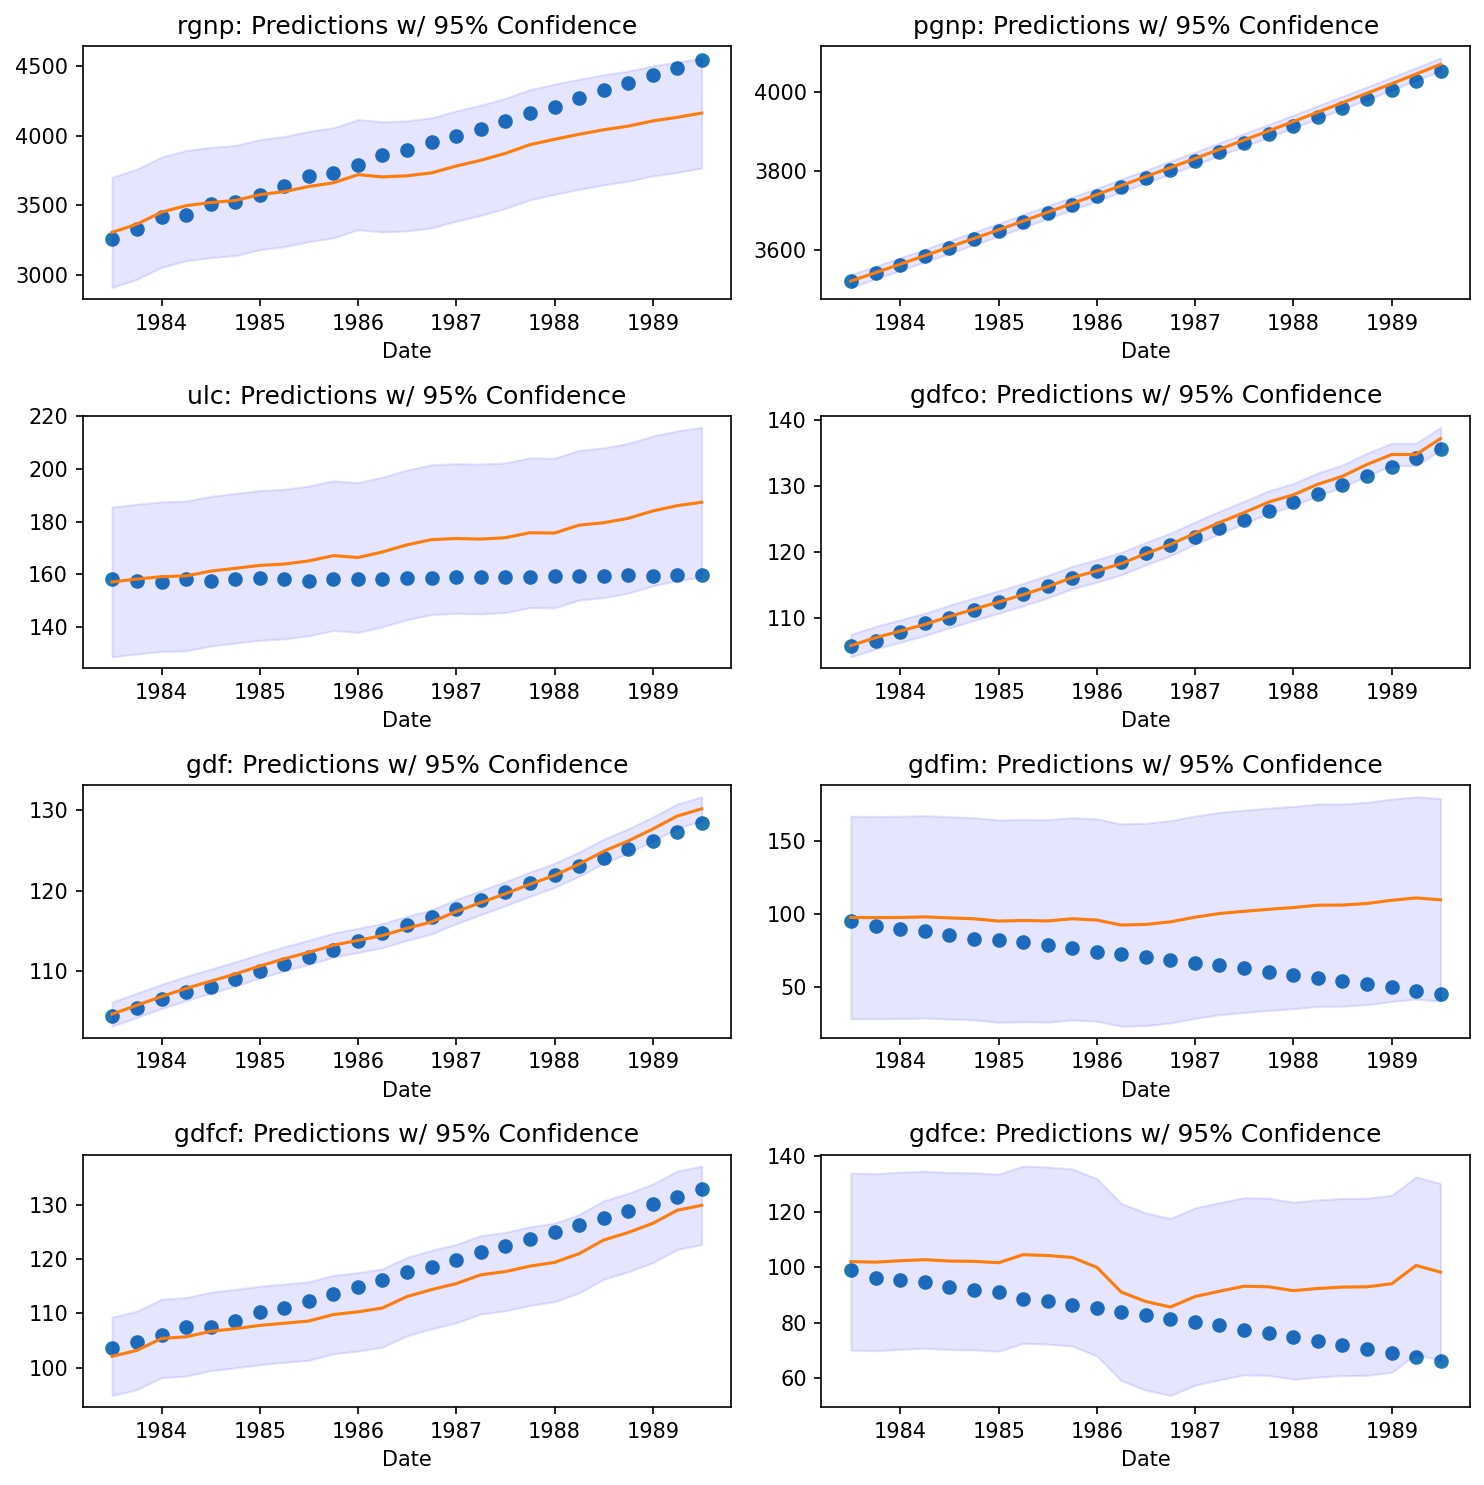

In [47]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    residuals = sorted([x - y for x, y in zip(df_results[col+'_forecast'].values , df_test[col].values)])
    RMSFE = np.sqrt(sum([x**2 for x in residuals]) / len(residuals))
    band_size = 1.96*RMSFE
    ax.plot(df_test.index, df_test[col], color='#fc7d0b', label='Valid')
    ax.scatter(df_test.index, df_results[col+'_forecast'])
    ax.fill_between(df_test.index, (df_test[col]-band_size), (df_test[col]+band_size), color='b', alpha=.1)
    ax.set_title(col + ": Predictions w/ 95% Confidence")
    ax.set_xlabel('Date')
    
plt.tight_layout();

The downside of this method is that the prediction interval is highly dependent on the residuals from the validation predictions. The prediction interval is likely overfitting to the variation in the validation set. 

Other evaluation metrics involved are Mallows'Cp and Adjusted R-Squared.

#### **<span style = 'color:purple'>3.3.10 Mallows’ Cp</span>**<a id ="Mallows"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
Mallows’ Cp is a metric that is used to pick the best regression model among several different models.

It is calculated as:

Cp = (RSS/MSE – N + 2(P+1)

where RSS is the Sum of Squares error (or Residual) for the model, which can be found in the ANOVA table in the Regression output;

MSE is the residual mean square of the true regression model;

N: The sample size

p_star is the number of parameters in the model, which equals the number of predictors plus 1 if the intercept is included in the model; the number of predictors, otherwise;

* If the value of Mallows’ Cp is less than the number of coefficients in the model (P+1) then the model is said to be unbiased.
* Models that have a Mallows’ Cp value near P+1 are said to have low bias.
* If every potential model has a high value for Mallows’ Cp, this is an indication that some important predictor variables are likely missing from each model.
* If several potential models have low values for Mallow’s Cp, choose the model with the lowest value as the best model to use.
* Also keep in mind that Mallows’ Cp is only one way to measure the quality of fit of a regression model.

Another commonly used metric is adjusted R-squared, which tells us the proportion of variance in the response variable that can be explained by the predictor variables in the model, adjusted for the number of predictor variables used.

When deciding which regression model is best among a list of several different models, it’s a good idea to look at both Mallows’ Cp and adjusted R-squared.

#### **<span style = 'color:purple'>3.3.11 Adjusted R-Squared</span>**<a id ="R-Squared"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model. It is calculated as:

$Adjusted \hspace{0.25cm} R^2 = 1 – [(1-R^2)*(n-1)/(n-k-1)]$
where:

$R^2$: The $R^2$ of the model

n: The number of observations

k: The number of predictor variables

Because $R^2$ always increases as you add more predictors to a model, adjusted $R^2$ can serve as a metric that tells you how useful a model is, adjusted for the number of predictors in a model.

## **<span style='color:green'>4. SARIMA model building</span>**<a id ='Sarima'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
Many time-series methods may perform better when a time-series is stationary, since forecasting values becomes a far easier task for a stationary time series. ARIMAs that include differencing (i.e., d > 0) assume that the data becomes stationary after differencing. This is called difference-stationary. Auto-correlation plots are an easy way to determine whether your time series is sufficiently stationary for modeling. If the plot does not appear relatively stationary, your model will likely need a differencing term. These can be determined by using an Augmented Dickey-Fuller test, or various other statistical testing methods. 

### **<span style = 'color:brown'>Model Identification & Estimation: Finding Non-seasonal and Seasonal Orders</span>**<a id = 'Finding-orders'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)


#### **<span style = 'color:purple'>Plot the decomposition of a time series.</span>**<a id ="decomposition"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

Time series decomposition works by splitting a time series into three components: seasonality, trends and random fluctiation. 

Time series decomposition is a mathematical procedure which transforms a time series into multiple different time series. The original time series is often split into 3 component series:

Seasonal: Patterns that repeat with a fixed period of time. 

Trend: The underlying trend of the metrics. 

Random: Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.

Plots the results of the time series decomposition in four plots: the ‘x’, ‘trend’, ‘seasonal’, and ‘random’ components.

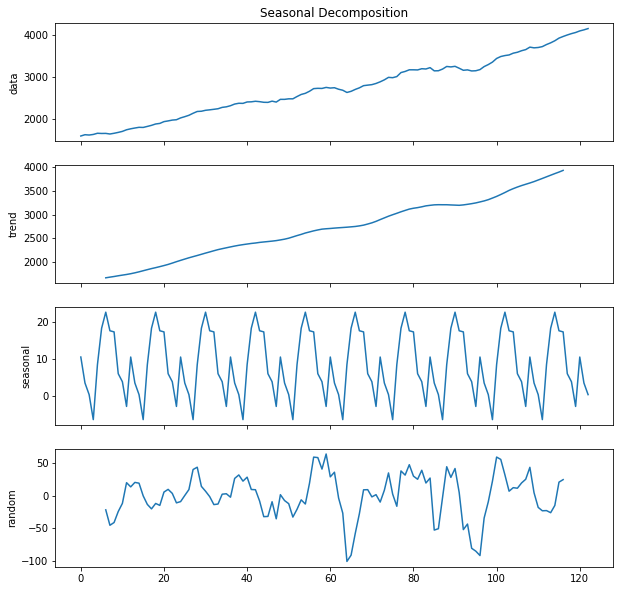

In [48]:
!pip install pmdarima --quiet
import pmdarima as pm
from pmdarima import arima
from pmdarima import utils
figure_kwargs = {'figsize': (10, 10)}
decomposed = arima.decompose(df['rgnp'].values, type_= "additive", m=12)
axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title("Seasonal Decomposition");

#### **<span style = 'color:purple'>Plot correlograms PACF & ACF plots</span>**<a id ="correlogram"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

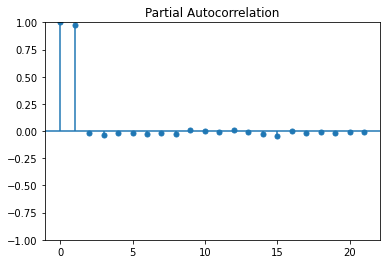

In [49]:
import pmdarima as pm
pm.plot_pacf(df['rgnp'],)

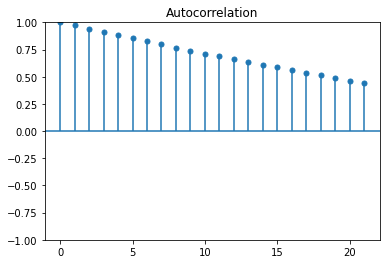

In [50]:
import pmdarima as pm
pm.plot_acf(df['rgnp'])

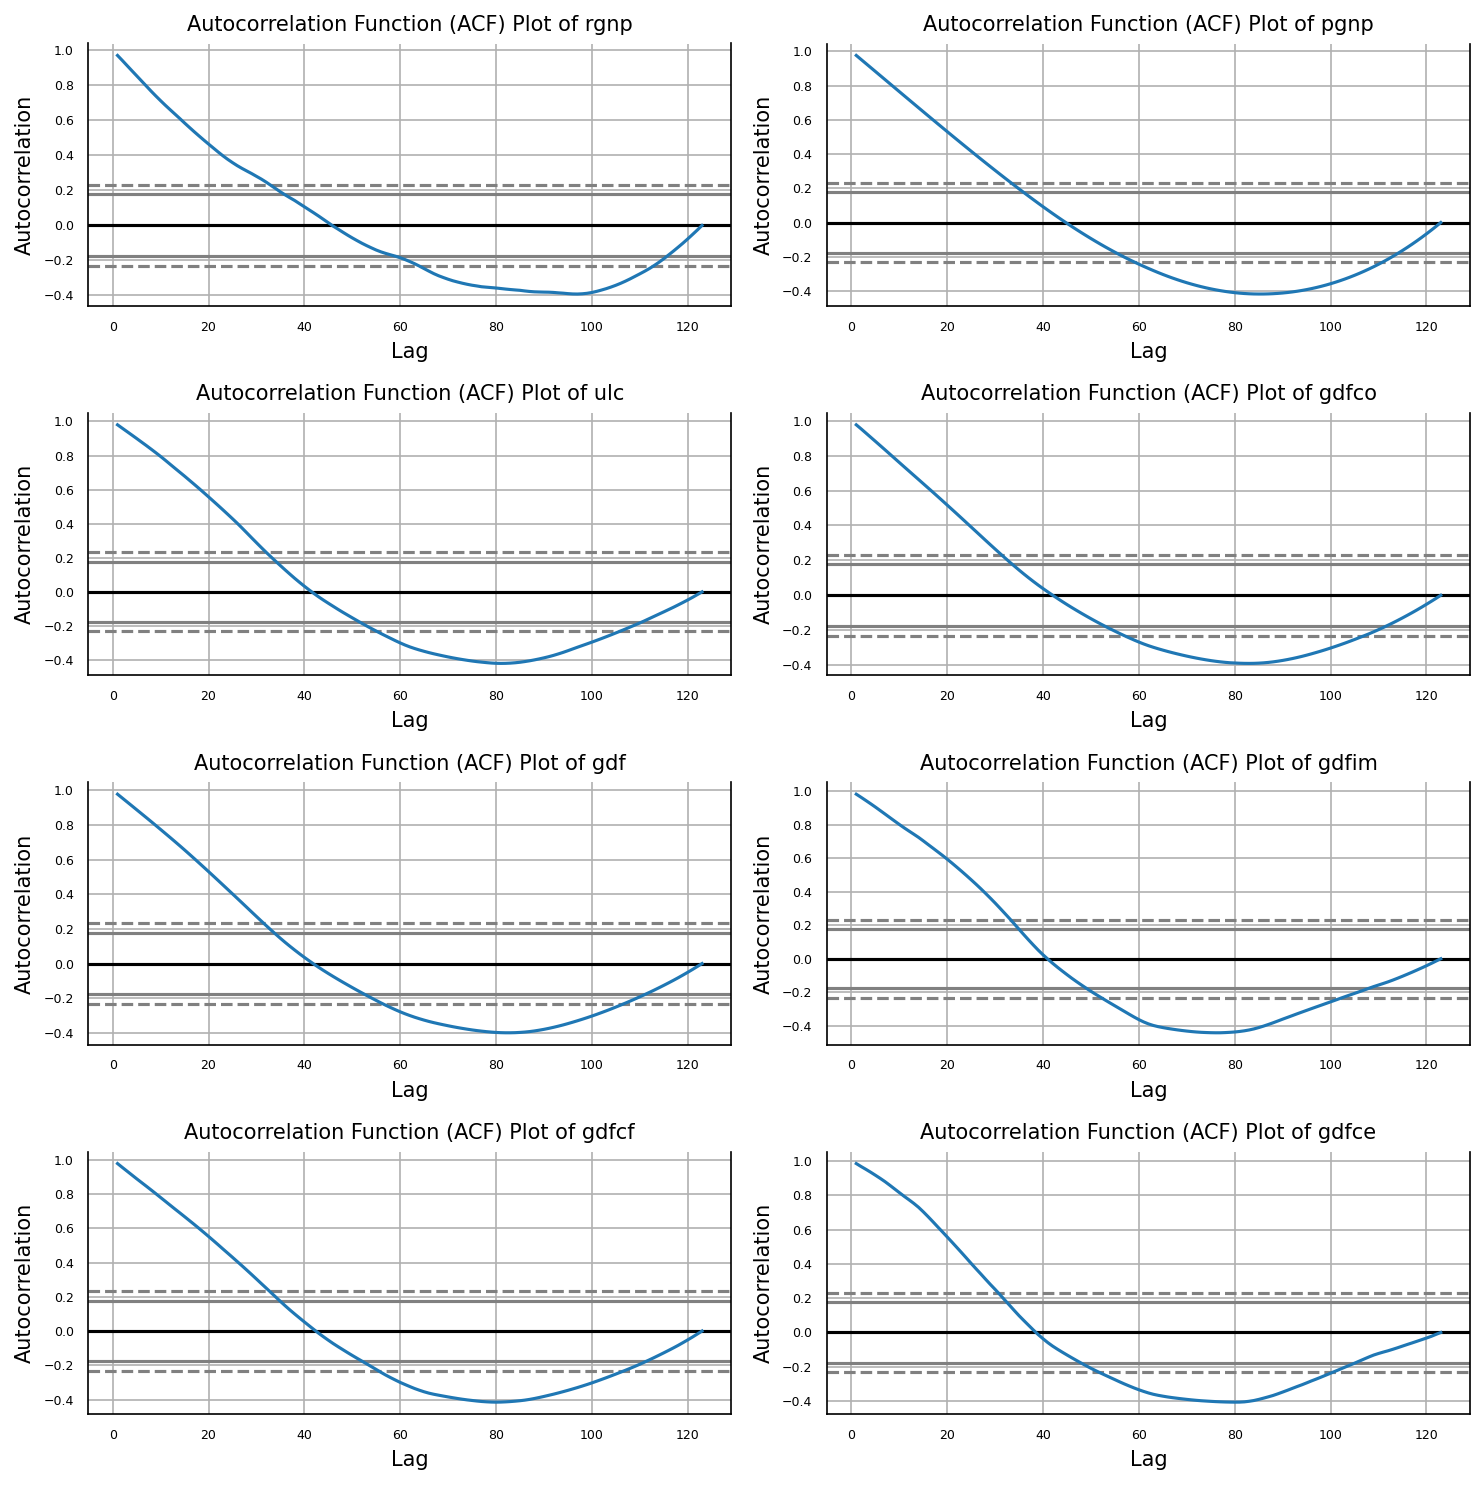

In [51]:
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    autocorrelation_plot(df[col], ax=ax);
    ax.set_title("Autocorrelation Function (ACF) Plot of " +col, fontsize = 10)    
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

To quantitatively determine whether we need to difference our data in order to make it stationary, we can conduct a test of stationarity (either ADFTest, PPTest or KPSSTest). This is the preferred public method for accessing tests of stationarity: 

In [52]:
from pmdarima.arima import auto_arima
from pmdarima.arima.stationarity import ADFTest

# Test whether we should difference at the alpha=0.05
# significance level
adf_test = ADFTest(alpha=0.05)
# Test whether we should difference at the alpha=0.05
# significance level
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(df_train['rgnp'])  # (0.01, False)
p_val1, should_diff1 = adf_test.should_diff(df_train_differenced['rgnp'])  # (0.01, False)
p_val, should_diff, p_val1, should_diff1

(0.18564745122463355, True, 0.01, False)

The verdict, as per the pmdarima ADF test, is that the original data should be differenced and the first differenced data should not be differenced further. In other words, a second differencing is not required. Pmdarima also provides a more handy interface for estimating d parameter more directly. 

In [53]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(df_train['rgnp'], test='adf')  

# Or a KPSS test (auto_arima default):
n_kpss = ndiffs(df_train['rgnp'], test='kpss')  

# Or a PP test:
n_pp = ndiffs(df_train['rgnp'], test='pp')  
#assert n_adf == n_kpss == n_pp == 0
n_adf, n_kpss, n_pp

(1, 1, 1)

Seasonality can manifest itself in timeseries data in unexpected ways. Sometimes trends are partially dependent on the time of year or month. Other times, they may be related to weather patterns. In either case, seasonality is a real consideration that must be made. The pmdarima package provides a test of seasonality for including seasonal terms in ARIMA models.

Seasonal ARIMA models have three parameters that heavily resemble our p, d and q parameters:

- P: The order of the seasonal component for the auto-regressive (AR) model.
- D: The integration order of the seasonal process.
- Q: The order of the seasonal component of the moving average (MA) model.

P and Q and be estimated similarly to p and q via auto_arima, 

D can be estimated via a Canova-Hansen test. 

However m generally requires subject matter knowledge of the data.



We can use a Canova-Hansen test to estimate our seasonal differencing term:

In [54]:
from pmdarima.arima.utils import nsdiffs
D = nsdiffs(df_train['rgnp'],
            m=10,  # commonly requires knowledge of dataset
            max_D=12,
            test='ch')  

# or use the OCSB test (by default)
D2 = nsdiffs(df_train['rgnp'],
        m=10,
        max_D=12,
        test='ocsb')  
D, D2

/opt/conda/lib/python3.7/site-packages/pmdarima/arima/seasonality.py:229: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frec = np.ones(int((s + 1) / 2), dtype=np.int)


(0, 0)

#### **<span style = 'color:purple'>Define & Plot Periodogram</span>**<a id ="Periodogram"></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [55]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(ts,detrend=detrend,fs = fs, window="boxcar",scaling='spectrum')
    if ax is None:
        _, ax = plt.subplots(figsize = (10,8))
    ax.step(freqencies, spectrum, color="red")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

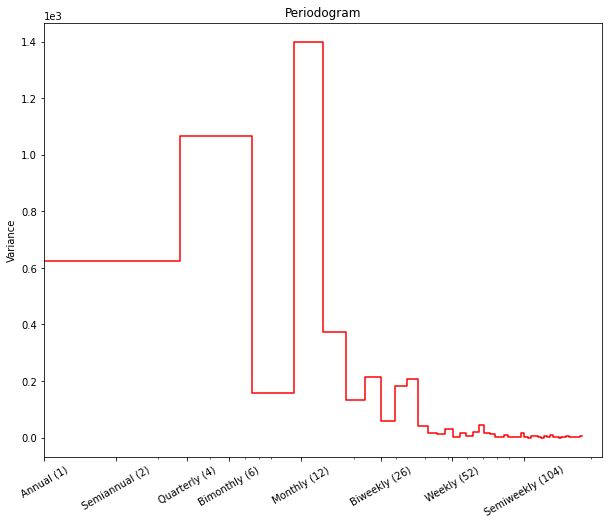

In [56]:
plot_periodogram(df_train['rgnp']);

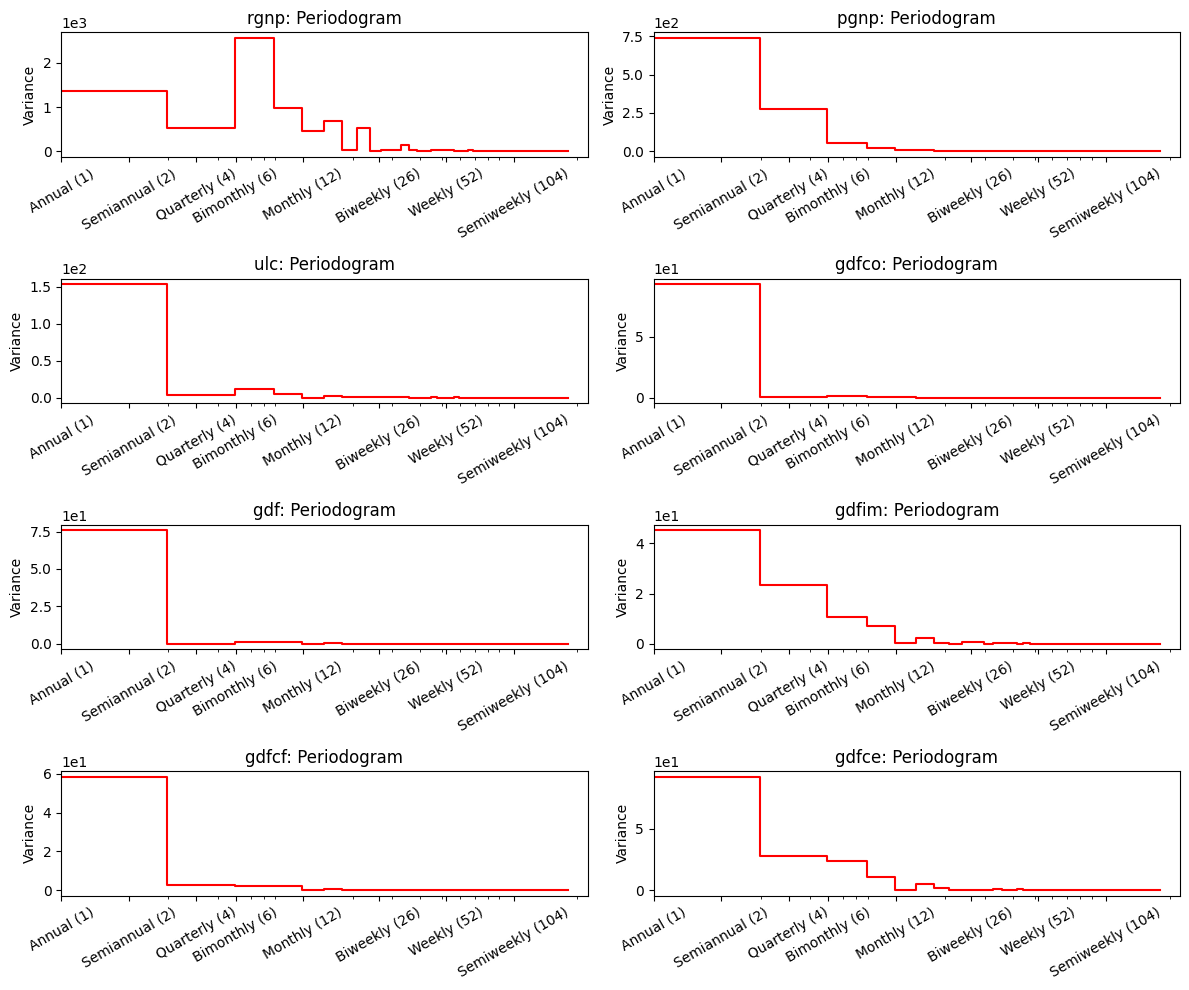

In [57]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=100, figsize=(12,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    plot_periodogram(df[col], ax = ax)
    ax.set_title(col + ": Periodogram");
plt.tight_layout()

The m parameter relates to the number of observations per seasonal cycle, and is one that must be known apriori. Data with daily observations might have a weekly seasonality (frequency=7) or an annual seasonality (frequency=365.25). Similarly, data that are observed every minute might have an hourly seasonality (frequency=60), a daily seasonality (frequency=24x60=1440), a weekly seasonality (frequency=24x60x7=10080) and an annual seasonality (frequency=24x60x365.25=525960). 

Typically, m will correspond to some recurrent periodicity such as:

1 Annually 

4 - Quarterly

12 - monthly

52 - weekly

7 - daily (weekly seasonality)

365.25 - daily (annual seasonality)



||                                                                                                                                         Frequencies|
|----------------|-------------------------------------------------------------------------------------------|

|Data| Minute |  Hour| Day| Week| Year|
|----------------|------------------|----------------|------------------|----------------|------------------|
|Daily| | | | 7|                     365.25|
|Hourly| | | 24| 168|                  8766|
|Half-hourly| | | 48| 336|            17532|
|Minutes| | 60| 1440| 10080|         525960|
|Seconds| 60| 3600| 86400| 804800| 31557600|



Depending on how it’s set, it can dramatically impact the outcome of an ARIMA model. 

Run the SARIMA model for the first variable, 'rgnp', with the above obtained parameters and m = 4 for quarterly sampling.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71902D+00    |proj g|=  1.29853D-01

At iterate    5    f=  4.70771D+00    |proj g|=  9.64141D-03


 This problem is unconstrained.



At iterate   10    f=  4.68786D+00    |proj g|=  8.80114D-02

At iterate   15    f=  4.66636D+00    |proj g|=  3.63272D-02

At iterate   20    f=  4.65964D+00    |proj g|=  1.23319D-02

At iterate   25    f=  4.65672D+00    |proj g|=  2.46609D-02

At iterate   30    f=  4.65180D+00    |proj g|=  1.21008D-02

At iterate   35    f=  4.64830D+00    |proj g|=  5.21319D-03

At iterate   40    f=  4.64720D+00    |proj g|=  2.58001D-03

At iterate   45    f=  4.64668D+00    |proj g|=  9.91396D-04

At iterate   50    f=  4.64611D+00    |proj g|=  1.20959D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65   

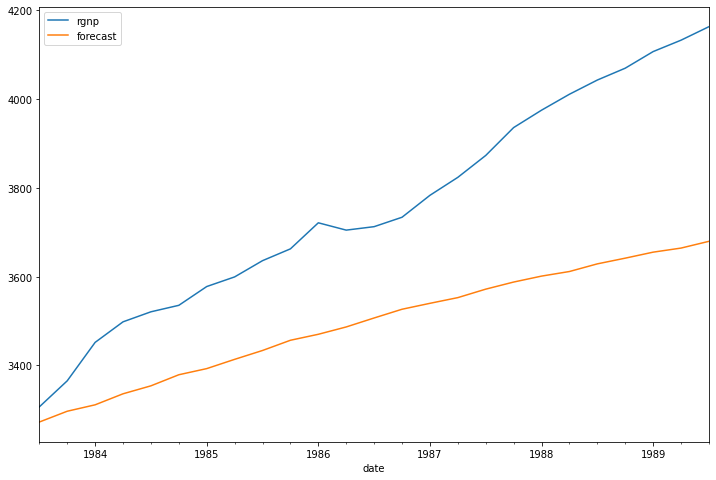

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df_train['rgnp'],order=(2, 1, 2),seasonal_order=(2,0,2,4),maxiter=15, simple_differencing = False )
results=model.fit()
df_test['forecast']= results.predict(start=len(df_train),end=len(df)-1,dynamic=True)

df_test[['rgnp','forecast']].plot(figsize=(12,8));

### **<span style = 'color:brown'>Model Diagnostics</span>**<a id = 'Sarima-Diagnostics'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)
One of the key assumptions in regression is that there is no correlation between the residuals, ie, residuals are independent.

To test for first-order autocorrelation, we can perform a Durbin-Watson test. However, if we’d like to test for autocorrelation at higher orders then we need to perform a Breusch-Godfrey test. This test is similar to Ljung-Box test and uses the same following hypotheses:

H0 (null hypothesis): There is no autocorrelation at any order less than or equal to p.

HA (alternative hypothesis): There exists autocorrelation at some order less than or equal to p.

In [59]:
import statsmodels.stats.diagnostic as smd
#ljung_box = smd.acorr_ljungbox(df_results['rgnp_forecast']-df_test['rgnp'], lags=10, return_df=True)
ljung_box = smd.acorr_ljungbox(results.resid, lags=10, return_df=True)
print("P-Values:", ljung_box.lb_pvalue.tolist(), "\n")
if (ljung_box.lb_pvalue < 0.05).any():
    print("The residuals are autocorrelated.")
else:
    print("The residuals are not autocorrelated.")

P-Values: [0.825416350347121, 0.9733782080933082, 0.9966393417291404, 0.9992494464349833, 0.9998729117594722, 0.9999820185335058, 0.9999948864044935, 0.9999992857732014, 0.9999998988340713, 0.9999999873861035] 

The residuals are not autocorrelated.


In [60]:
import statsmodels.stats.diagnostic as smd
breusch_godfrey = smd.acorr_breusch_godfrey(results, nlags=4)
print("\n P-Values:", breusch_godfrey)
if (breusch_godfrey[0]< 0.05):
    print("The residuals are autocorrelated.")
else:
    print("The residuals are not autocorrelated.")


 P-Values: (0.05180888736990408, 0.9996702183062627, 0.012297895628971907, 0.9996962514770479)
The residuals are not autocorrelated.


### **<span style = 'color:brown'>Model Identification & Estimation using Auto Arima</span>**<a id = 'Auto-Arima'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [61]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(df_train['rgnp'], start_p = 1, start_q = 1, 
                      max_p = 4, max_q = 4, m = 4, 
                      start_P = 0, start_Q = 0, max_P = 4, max_Q = 4, seasonal = True, 
                      start_d = 0, max_d = 2, max_D = 2, start_D = 0, trace = True,)
df_test['forecast'] = arima_model.predict(n_periods=len(df_test))
arima_model.summary

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=920.654, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=922.006, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=921.436, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=922.513, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=951.554, Time=0.02 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=922.648, Time=0.26 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=922.644, Time=0.26 sec
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=924.585, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=920.535, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=922.520, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=924.535, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=919.465, Time=0.13 sec
 ARIMA(0,1,2)(1,0,0)[4] intercept   : AIC=921.464, Time=0.22 sec
 ARIMA(0,1,2)(0,0,1)[4] intercept   : AIC=921.464, Time=0.24 sec
 ARIMA(0,1,2)(1,0,1)[4] intercept   : AIC=921.1

<function pmdarima.arima.arima.ARIMA.summary(self)>

The model with the smallest AIC (or BIC, or AICc, etc., depending on the minimization criteria) is selected. 

In [62]:
get_parametes =arima_model.get_params()
print(type(get_parametes))
get_parametes

<class 'dict'>


{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 4),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Plotting the residuals and checking if they meet the i.i.d (independent and identically distributed) requirements

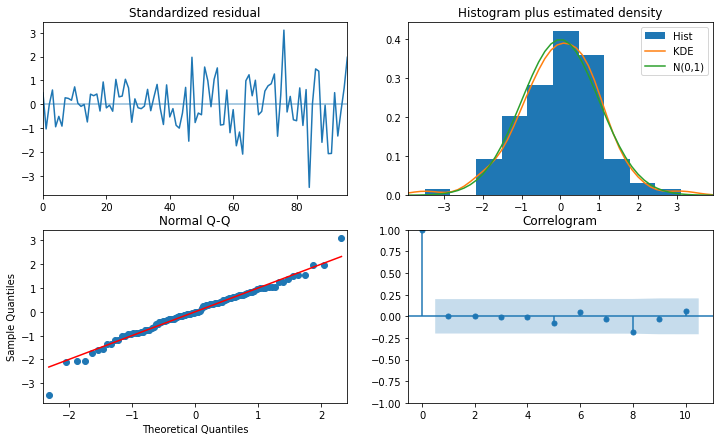

In [63]:
plot = arima_model.plot_diagnostics(figsize=(12, 7))

It can be seen from the quantile and histogram plots that the fit is not that great. The bottom right plot, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. It is also possible to check for autocorrelation quantitatively using a Ljung-Box test. Using the acorr_ljungbox function from the statsmodels package and the default maximum lag:

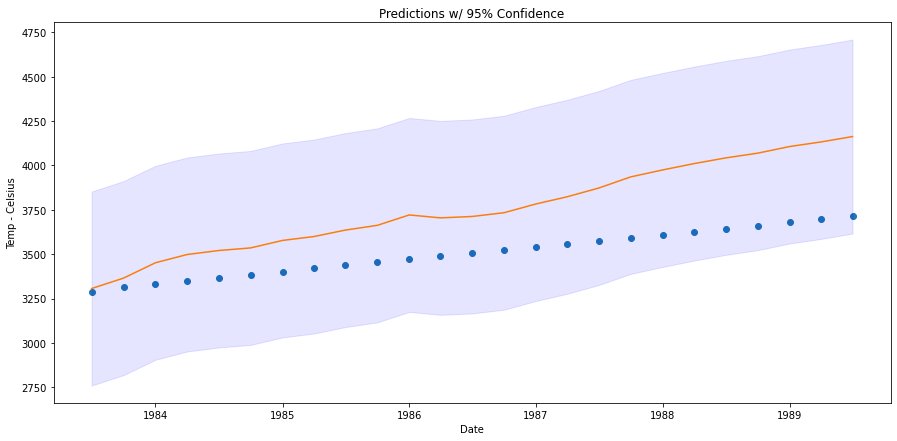

In [64]:
residuals = sorted([x - y for x, y in zip(df_test['forecast'].values , df_test['rgnp'].values)])
RMSFE = np.sqrt(sum([x**2 for x in residuals]) / len(residuals))
band_size = 1.96*RMSFE
    
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_test.index, df_test['rgnp'], color='#fc7d0b', label='Valid')
ax.scatter(df_test.index, df_test['forecast'])
ax.fill_between(df_test.index, (df_test['rgnp']-band_size), (df_test['rgnp']+band_size), color='b', alpha=.1)
ax.set_title("Predictions w/ 95% Confidence")
ax.set_xlabel('Date')
ax.set_ylabel('Temp - Celsius')
plt.show()

Run auto-arima for all variables

In [65]:
for i in df_train.columns:
    arima_model = auto_arima(df_train[i], start_p = 1, start_q = 1, 
                      max_p = 8, max_q = 3, m = 4, 
                      start_P = 0, seasonal = True, 
                      start_d = 0, max_d = 2, max_D = 2, start_D = 0, trace = False, test='kpss')
    df_test[i+'_forecast'] = arima_model.predict(n_periods=len(df_test))
    arima_model.summary

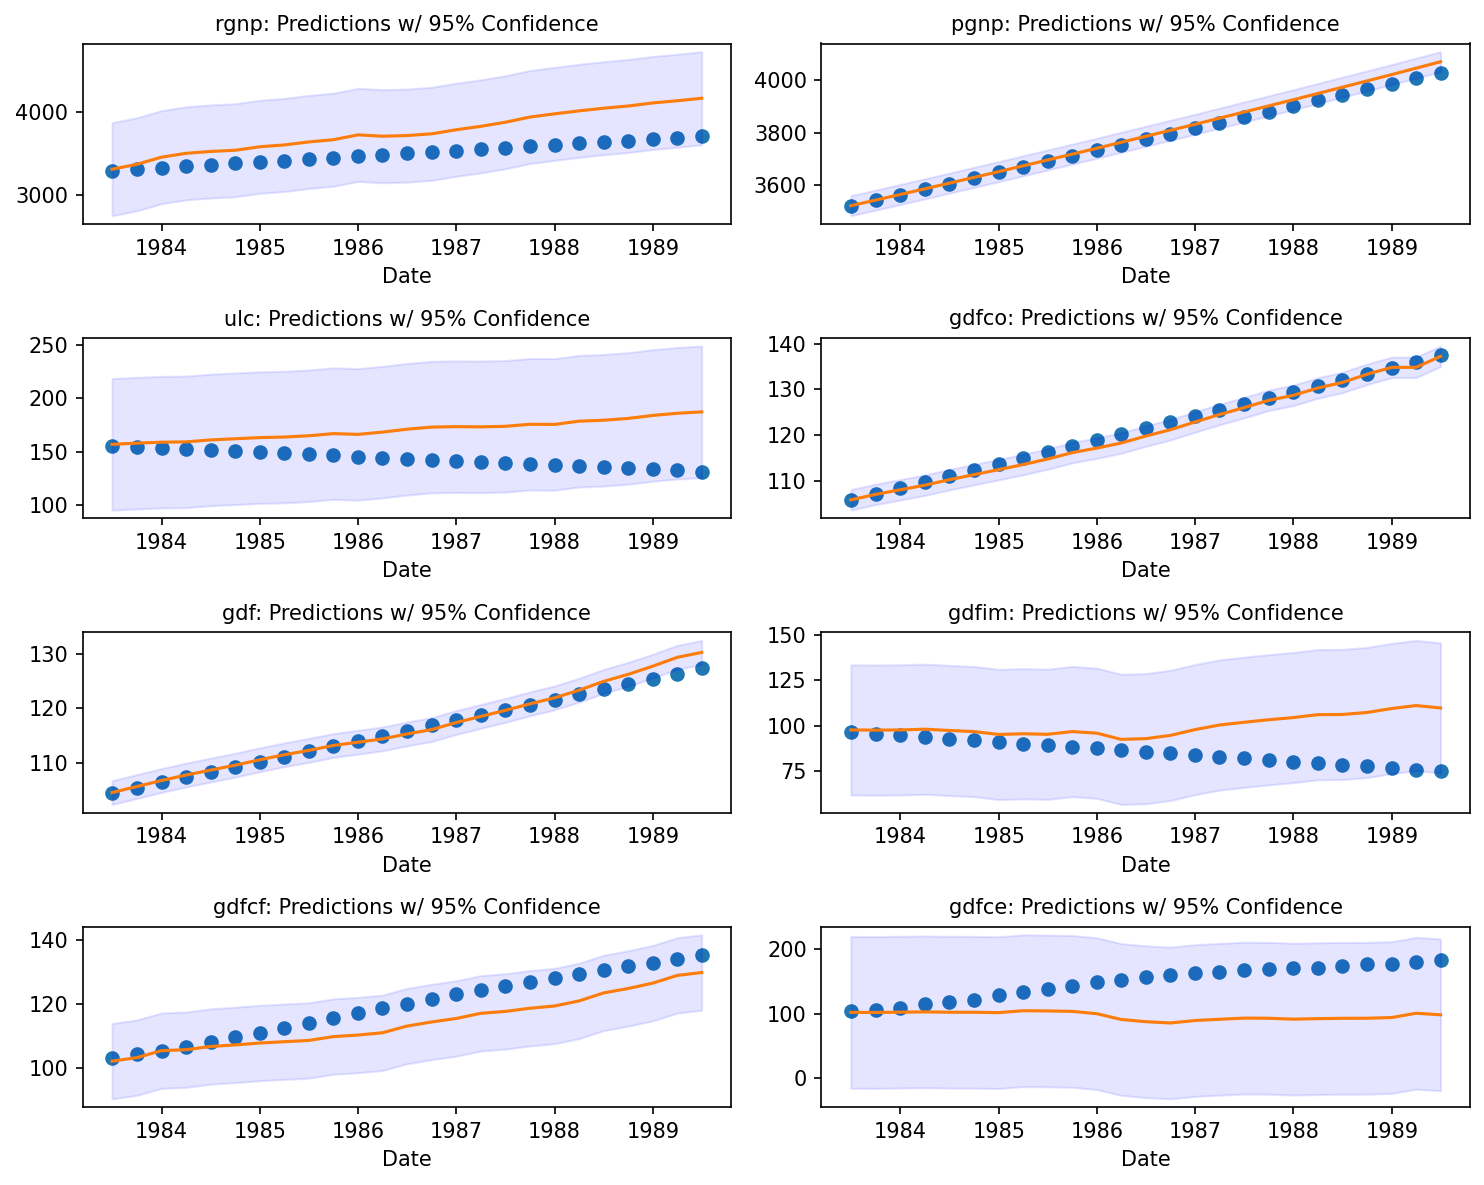

In [66]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,8))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    residuals = sorted([x - y for x, y in zip(df_test[col+'_forecast'].values , df_test[col].values)])
    RMSFE = np.sqrt(sum([x**2 for x in residuals]) / len(residuals))
    band_size = 1.96*RMSFE
    ax.plot(df_test.index, df_test[col], color='#fc7d0b', label='Valid')
    ax.scatter(df_test.index, df_test[col+'_forecast'])
    ax.fill_between(df_test.index, (df_test[col]-band_size), (df_test[col]+band_size), color='b', alpha=.1)
    ax.set_title(col + ": Predictions w/ 95% Confidence", fontsize = 10)
    ax.set_xlabel('Date')
    
plt.tight_layout();

## **<span style='color:green'>5. SARIMAX with Fourier Terms model building</span>**<a id ='Sarimax'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

This is done to utilize exogenous variables in SARIMAX to model additional seasonalities with Fourier terms.

We will keep modeling the yearly pattern with seasonal part of SARIMA. For the half yesrly seasonal pattern apply fourier terms. I have compared multiple choices for the number of Fourier terms and 1 provides the best forcasts among them. Therefore we shall use 2 Fourier terms as exogenous variables.

Applying for 'rgnp' first.

In [67]:
# prepare Fourier terms
exog = pd.DataFrame({'date': df['rgnp'].index})
exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='Q'))
exog['sin365'] = np.sin(2 * np.pi * exog.index.quarter / 2)
exog['cos365'] = np.cos(2 * np.pi * exog.index.quarter / 2)
#exog['sin365_2'] = np.sin(4 * np.pi * exog.index.quarter / 2)
#exog['cos365_2'] = np.cos(4 * np.pi * exog.index.quarter / 2)
exog = exog.drop(columns=['date'])
exog_to_train = exog[0:-size]
exog_to_test = exog[-size:]
# Fit model
arima_exog_model = auto_arima(y=df_train['rgnp'], exogenous=exog_to_train, max_p = 4, max_q = 4, m = 4, 
                      start_P = 0, start_Q = 0, max_P = 4, max_Q = 4, seasonal = True, 
                      start_d = 0, max_d = 2, max_D = 2, start_D = 0, trace = False)
# Forecast
y_arima_exog_forecast = arima_exog_model.predict(n_periods=len(df_test), exogenous=exog_to_test)

/opt/conda/lib/python3.7/site-packages/pmdarima/compat/pmdarima.py:22: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  DeprecationWarning
/opt/conda/lib/python3.7/site-packages/pmdarima/compat/pmdarima.py:22: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  DeprecationWarning


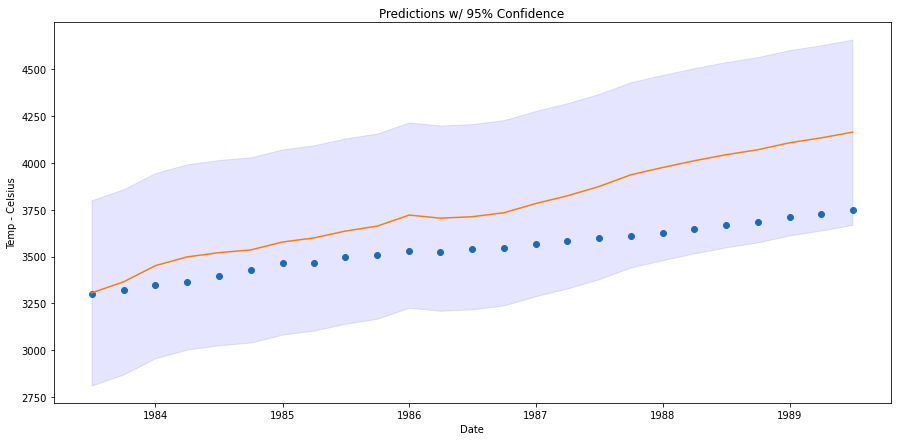

In [68]:
residuals = sorted([x - y for x, y in zip(y_arima_exog_forecast , df_test['rgnp'].values)])
RMSFE = np.sqrt(sum([x**2 for x in residuals]) / len(residuals))
band_size = 1.96*RMSFE
    
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_test.index, df_test['rgnp'], color='#fc7d0b', label='Valid')
ax.scatter(df_test.index, y_arima_exog_forecast)
ax.fill_between(df_test.index, (df_test['rgnp']-band_size), (df_test['rgnp']+band_size), color='b', alpha=.1)
ax.set_title("Predictions w/ 95% Confidence")
ax.set_xlabel('Date')
ax.set_ylabel('Temp - Celsius')
plt.show()

Now, spplying for all variables.

In [69]:
for i in df_train.columns:
    arima_model = auto_arima(df_train[i], start_p = 1, start_q = 1, 
                      max_p = 8, max_q = 3, m = 4, 
                      start_P = 0, seasonal = True, 
                      start_d = 0, max_d = 2, max_D = 2, start_D = 0, trace = False, test='kpss')
    df_test[i+'_forecast'] = arima_model.predict(n_periods=len(df_test))
    arima_model.summary

In [70]:
for i in df_train.columns:
    # prepare Fourier terms
    exog = pd.DataFrame({'date': df[i].index})
    exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='Q'))
    exog['sin365'] = np.sin(2 * np.pi * exog.index.quarter/2)
    exog['cos365'] = np.cos(2 * np.pi * exog.index.quarter/2)
    #exog['sin365_2'] = np.sin(4 * np.pi * exog.index.quarter/2)
    #exog['cos365_2'] = np.cos(4 * np.pi * exog.index.quarter/2)
    #exog['sin365_3'] = np.sin(6 * np.pi * exog.index.quarter/2)
    #exog['cos365_3'] = np.cos(6 * np.pi * exog.index.quarter/2)
    #exog['sin365_4'] = np.sin(8 * np.pi * exog.index.quarter/2)
    #exog['cos365_4'] = np.cos(8 * np.pi * exog.index.quarter/2)
    exog = exog.drop(columns=['date'])
    exog_to_train = exog[0:-size]
    exog_to_test = exog[-size:]
    # Fit model
    arima_exog_model = auto_arima(y=df_train[i], exogenous=exog_to_train, max_p = 4, max_q = 4, m = 4, 
                      start_P = 0, start_Q = 0, max_P = 4, max_Q = 4, seasonal = True, 
                      start_d = 0, max_d = 2, max_D = 2, start_D = 0, trace = False)
    # Forecast
    df_test[i+'_exog_forecast'] = arima_exog_model.predict(n_periods=len(df_test), exogenous=exog_to_test)

/opt/conda/lib/python3.7/site-packages/pmdarima/compat/pmdarima.py:22: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  DeprecationWarning
/opt/conda/lib/python3.7/site-packages/pmdarima/compat/pmdarima.py:22: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  DeprecationWarning
/opt/conda/lib/python3.7/site-packages/pmdarima/compat/pmdarima.py:22: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  DeprecationWarning
/opt/conda/lib/python3.7/site-packages/pmdarima/c

In [71]:
for i in df.columns:
    print(f'\n \n Evaluation metric for {i}')
    print(evaluation_metrics(df_test[i+'_exog_forecast'].values , df_test[i].values))


 
 Evaluation metric for rgnp
MAPE : 0.05718561333307649
ME : -221.61424570121923
MAE : 221.61424570121923
MPE : -0.05718561333307649
RMSE : 251.98481872906606
CORR : 0.9887973490947901
RSS : 1587408.721748007
MINMAX : 0.05718561333307648
None

 
 Evaluation metric for pgnp
MAPE : 0.0036957077363384324
ME : -14.512497302918037
MAE : 14.51324881412611
MPE : -0.003695494402472911
RMSE : 19.376120246450004
CORR : 0.9998125275797387
RSS : 9385.850895122245
MINMAX : 0.003695707736053988
None

 
 Evaluation metric for ulc
MAPE : 0.1533619146274278
ME : -26.924238637412216
MAE : 26.924238637412216
MPE : -0.1533619146274278
RMSE : 31.342925726365387
CORR : -0.9921393292646188
RSS : 24559.47482721143
MINMAX : 0.15336191462742776
None

 
 Evaluation metric for gdfco
MAPE : 0.008437670823296132
ME : 1.0072451970121301
MAE : 1.0072451970121301
MPE : 0.008437670823296132
RMSE : 1.177065139561169
CORR : 0.9979809245991333
RSS : 34.63705856925387
MINMAX : 0.00834077012988188
None

 
 Evaluation metr

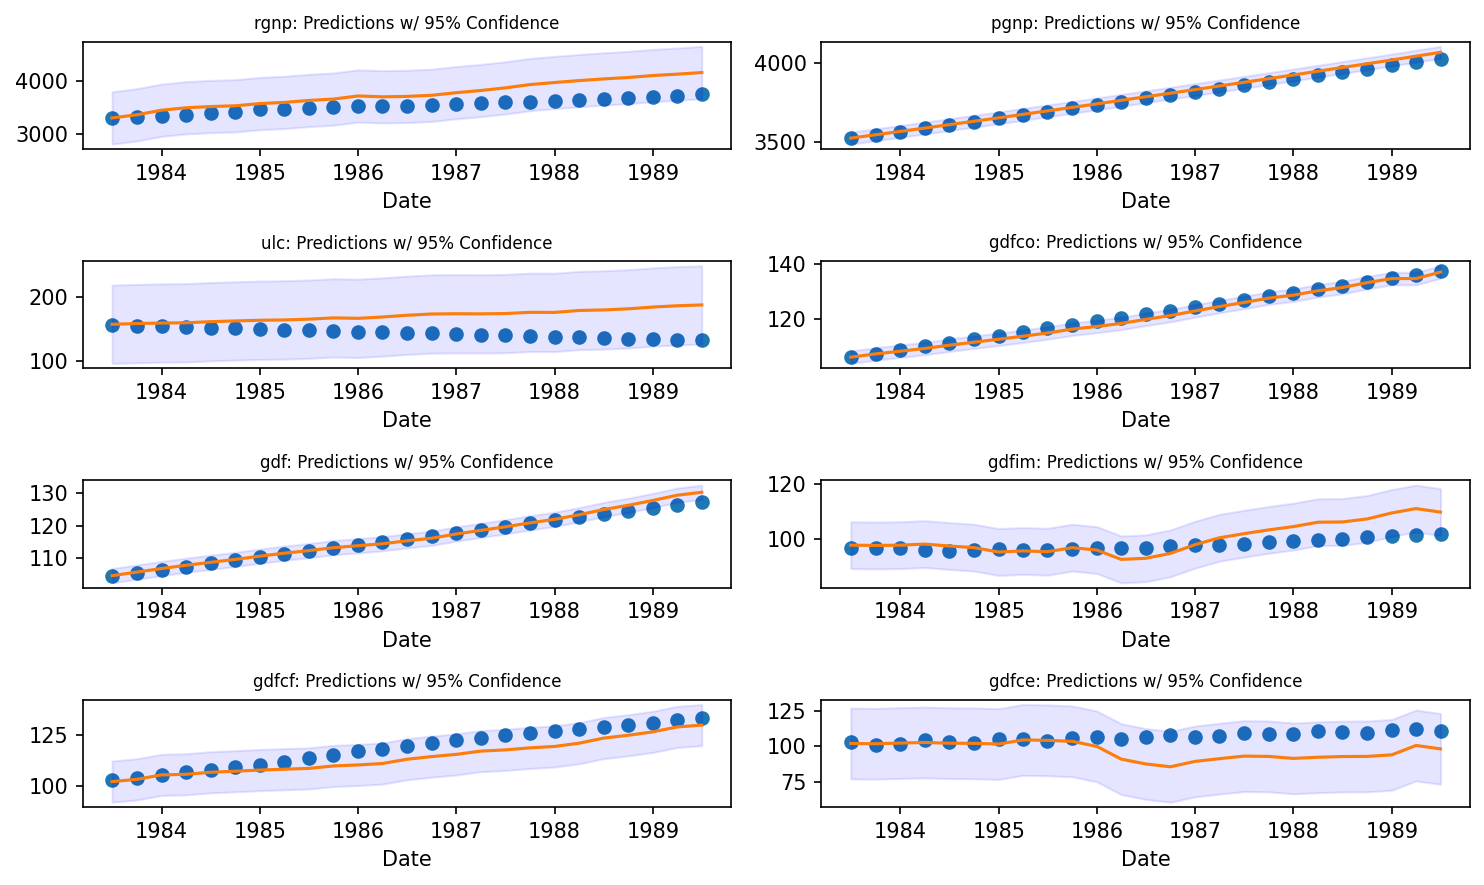

In [72]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    residuals = sorted([x - y for x, y in zip(df_test[col+'_exog_forecast'].values , df_test[col].values)])
    RMSFE = np.sqrt(sum([x**2 for x in residuals]) / len(residuals))
    band_size = 1.96*RMSFE
    ax.plot(df_test.index, df_test[col], color='#fc7d0b', label='Valid')
    ax.scatter(df_test.index, df_test[col+'_exog_forecast'])
    ax.fill_between(df_test.index, (df_test[col]-band_size), (df_test[col]+band_size), color='b', alpha=.1)
    ax.set_title(col + ": Predictions w/ 95% Confidence", fontsize = 8)
    ax.set_xlabel('Date')
    
plt.tight_layout();

## **<span style='color:green'>6. Final Verdict</span>**<a id ='Final'></a>
[<div style="text-align: right"> Back to Table of contents</div>](#Table)

In [73]:
def evaluation_metrics_condensed1(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    MSE = np.mean((forecast - actual)**2)       # MSE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #RSS = np.sum((forecast - actual) ** 2)     # RSS
    RSS = np.sum(np.square(forecast - actual))  # RSS
    
    
    return(mape, me, mae, MSE, mpe, rmse, corr, minmax, RSS)

In [74]:
for i in df.columns:
    print(f'\n \n Evaluation metric for {i}')
    Metrics_output = pd.DataFrame(evaluation_metrics_condensed1(df_results[i+'_forecast'].values, df_test[i]), columns = ['VAR'], 
                              index = ['MAPE', 'ME', 'MAE', 'MSE','MPE', 'RMSE', 'CORR', 'MINMAX', 'RSS'])
    Metrics_output['SARIMA'] = evaluation_metrics_condensed1(df_test[i+'_forecast'].values, df_test[i])
    Metrics_output['SARIMAX'] = evaluation_metrics_condensed1(df_test[i+'_exog_forecast'].values, df_test[i])
    display(Metrics_output.T)


 
 Evaluation metric for rgnp


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.041686,146.814277,163.070556,40751.987003,0.036937,201.871214,0.994516,0.039311,1.018800e+06
SARIMA,0.067508,-260.342361,260.342361,82252.564633,-0.067508,286.797079,0.993870,0.067508,2.056314e+06
SARIMAX,0.057186,-221.614246,221.614246,63496.348870,-0.057186,251.984819,0.988797,0.057186,1.587409e+06



 
 Evaluation metric for pgnp


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.001661,-6.489730,6.489730,68.562718,-0.001661,8.280261,0.999951,0.001661,1714.067961
SARIMA,0.003712,-14.576000,14.576000,378.126400,-0.003712,19.445472,0.999813,0.003712,9453.160001
SARIMAX,0.003696,-14.512497,14.513249,375.434036,-0.003695,19.376120,0.999813,0.003696,9385.850895



 
 Evaluation metric for ulc


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.068584,-12.003202,12.084696,210.871631,-0.068065,14.521420,0.918959,0.068582,5271.790767
SARIMA,0.153394,-26.929860,26.929860,982.776415,-0.153394,31.349265,-0.992139,0.153394,24569.410374
SARIMAX,0.153362,-26.924239,26.924239,982.378993,-0.153362,31.342926,-0.992139,0.153362,24559.474827



 
 Evaluation metric for gdfco


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.004773,-0.564826,0.612357,0.756980,-0.004359,0.870046,0.999139,0.004773,18.924490
SARIMA,0.008118,0.964748,0.967694,1.305077,0.008096,1.142399,0.997976,0.008026,32.626914
SARIMAX,0.008438,1.007245,1.007245,1.385482,0.008438,1.177065,0.997981,0.008341,34.637059



 
 Evaluation metric for gdf


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.005008,-0.395376,0.597558,0.593766,-0.003277,0.770562,0.996495,0.005005,14.844138
SARIMA,0.005928,-0.493752,0.727027,1.242756,-0.003916,1.114790,0.994055,0.005924,31.068907
SARIMAX,0.005947,-0.499485,0.729288,1.252089,-0.003964,1.118968,0.994055,0.005942,31.302236



 
 Evaluation metric for gdfim


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.290162,-29.841196,29.841196,1255.733536,-0.290162,35.436331,-0.791991,0.290162,31393.338391
SARIMA,0.138654,-14.388000,14.388000,334.041200,-0.138654,18.276794,-0.782290,0.138654,8351.030000
SARIMAX,0.032065,-2.261240,3.325313,19.148289,-0.020700,4.375876,0.936283,0.031882,478.707235



 
 Evaluation metric for gdfcf


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.029363,3.392486,3.392486,13.586665,0.029363,3.686009,0.989886,0.028391,339.666620
SARIMA,0.046350,5.392701,5.399028,36.440220,0.046290,6.036573,0.978443,0.043845,911.005488
SARIMAX,0.039330,4.561715,4.562276,26.741606,0.039325,5.171229,0.974388,0.037452,668.540147



 
 Evaluation metric for gdfce


,MAPE,ME,MAE,MSE,MPE,RMSE,CORR,MINMAX,RSS
VAR,0.147942,-14.303758,14.303758,266.316587,-0.147942,16.319209,0.565944,0.147942,6657.914677
SARIMA,0.554218,52.123958,52.123958,3576.799827,0.554218,59.806353,-0.663765,0.323772,89419.995669
SARIMAX,0.109085,9.917444,10.081664,161.759920,0.107485,12.718487,-0.550146,0.092824,4043.997992


## **Concluding remarks**
As can be derived from the final comparison table for evaluation of all three models, Sarimax with one fourier term gives the best result, even satisfying the i.i.d (independent and identically distributed) requirements. 

## **References:**

1. [KPSS Test for Stationarity](https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/)
2. [Vector Autoregression (VAR) – Comprehensive Guide with Examples in Python](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/)
3. [Hands-on Time Series Analysis with Python By   B V Vishwas,  Ashish Patel](https://link.springer.com/book/10.1007/978-1-4842-5992-4)
4. [Methods for Normality Test with Application in Python](https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5)
5. [Time Series Forecasting: Prediction Intervals](https://towardsdatascience.com/time-series-forecasting-prediction-intervals-360b1bf4b085)
6. [Residuals Analysis](https://www.quantrocket.com/codeload/quant-finance-lectures/quant_finance_lectures/Lecture18-Residual-Analysis.ipynb.html)
7. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)